# importacion de datos

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('cumulative.csv')
df

disposicion_literatura disposicion_kepler  confianza_disposicion  \
0                 CONFIRMED          CANDIDATE                  1.000   
1                 CONFIRMED          CANDIDATE                  0.969   
2          'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
3          'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
4                 CONFIRMED          CANDIDATE                  1.000   
...                     ...                ...                    ...   
9559       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
9560       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
9561              CANDIDATE          CANDIDATE                  0.497   
9562       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.021   
9563       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   

      columna_fpflag_nt  columna_fpflag_ss  columna_fpflag_co  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  1                  0   
3                     0                  1                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
9559                  0                  0                  0   
9560                  0                  1                  1   
9561                  0                  0                  0   
9562                  0                  0                  1   
9563                  0                  0                  1   

      columna_fpflag_ec  periodo_orbital  columna_period_err1  \
0                     0         0.000071             0.000162   
1                     0         0.000417             0.001438   
2                     0         0.000151             0.000087   
3                     0         0.000012             0.000000   
4                     0         0.000018             0.000023   
...                 ...              ...                  ...   
9559                  1         0.000064             0.001072   
9560                  0         0.000002             0.000000   
9561                  0         0.000012             0.000104   
9562                  0         0.000003             0.000012   
9563                  1         0.000035             0.000371   

      columna_period_err2  ...  columna_steff_err2  gravedad_superficial  \
0                0.999838  ...            0.954030              0.831296   
1                0.998562  ...            0.954030              0.831296   
2                0.999913  ...            0.900114              0.845778   
3                1.000000  ...            0.901249              0.849539   
4                0.999977  ...            0.880250              0.825842   
...                   ...  ...                 ...                   ...   
9559             0.998928  ...            0.913734              0.799135   
9560             1.000000  ...            0.905789              0.842957   
9561             0.999896  ...            0.875142              0.826970   
9562             0.999988  ...            0.866061              0.827534   
9563             0.999629  ...            0.872304              0.815874   

      columna_slogg_err1  columna_slogg_err2  radio_estrella  \
0               0.043478            0.920464        0.003560   
1               0.043478            0.920464        0.003560   
2               0.029891            0.854184        0.003303   
3               0.036005            0.860812        0.002968   
4               0.047554            0.826015        0.004077   
...                  ...                 ...             ...   
9559            0.156929            0.843413        0.004260   
9560            0.023777            0.837614        0.003455   
9561            0.038043            0.814416        0.004012   
9562         

# Preprocesamientos de los datos

El preprocesamiento se realizó en Weka (versión 3.8) para garantizar la calidad de los
datos. Los pasos incluyeron:
1. Se eliminaron las columnas **columna_rowid**, **columna_kepid**, **nombre_kepoi**, **nombre_kepler**, que son identificadores sin valor predictivo.
2. Se Los valores ’?’ en atributos numéricos fueron reemplazados por la media de cada columna utilizando el filtro ReplaceMissingValues
3. Los atributos numéricos se escalaron al rango [0, 1] con el filtro Normalize para garantizar una contribución equitativa en PCA y el modelado

## Verificamos que ningun valor falte

In [8]:
missing_values = df.isnull().sum()
print(missing_values)
print("Total de valores faltantes:", missing_values.sum())  # Suma total


disposicion_literatura    0
disposicion_kepler        0
confianza_disposicion     0
columna_fpflag_nt         0
columna_fpflag_ss         0
columna_fpflag_co         0
columna_fpflag_ec         0
periodo_orbital           0
columna_period_err1       0
columna_period_err2       0
columna_time0bk           0
columna_time0bk_err1      0
columna_time0bk_err2      0
columna_impact            0
columna_impact_err1       0
columna_impact_err2       0
duracion_transito         0
columna_duration_err1     0
columna_duration_err2     0
profundidad_transito      0
columna_depth_err1        0
columna_depth_err2        0
radio_planeta             0
columna_prad_err1         0
columna_prad_err2         0
columna_teq               0
columna_insol             0
columna_insol_err1        0
columna_insol_err2        0
columna_model_snr         0
columna_tce_plnt_num      0
temperatura_estrella      0
columna_steff_err1        0
columna_steff_err2        0
gravedad_superficial      0
columna_slogg_err1  

In [21]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('cumulative_preprocesado.csv')
scaler = MinMaxScaler()
df['magnitud_kepler'] = scaler.fit_transform(df[['magnitud_kepler']])  # normalizacion de la columna "magnitud_kepler"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   disposicion_literatura  9564 non-null   object 
 1   disposicion_kepler      9564 non-null   object 
 2   confianza_disposicion   9564 non-null   float64
 3   columna_fpflag_nt       9564 non-null   int64  
 4   columna_fpflag_ss       9564 non-null   int64  
 5   columna_fpflag_co       9564 non-null   int64  
 6   columna_fpflag_ec       9564 non-null   int64  
 7   periodo_orbital         9564 non-null   float64
 8   columna_period_err1     9564 non-null   float64
 9   columna_period_err2     9564 non-null   float64
 10  columna_time0bk         9564 non-null   float64
 11  columna_time0bk_err1    9564 non-null   float64
 12  columna_time0bk_err2    9564 non-null   float64
 13  columna_impact          9564 non-null   float64
 14  columna_impact_err1     9564 non-null   

## Aplicando One Hot Encoder para datos nominales

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Supongamos que 'df' es tu DataFrame original
# Aplica OneHotEncoder solo a disposicion_kepler (o las categóricas que no son objetivo)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[['disposicion_kepler']])  # Solo disposicion_kepler
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
df = pd.concat([df.drop(['disposicion_kepler'], axis=1), df_encoded], axis=1)
df

disposicion_literatura  confianza_disposicion  columna_fpflag_nt  \
0                 CONFIRMED                  1.000                  0   
1                 CONFIRMED                  0.969                  0   
2          'FALSE POSITIVE'                  0.000                  0   
3          'FALSE POSITIVE'                  0.000                  0   
4                 CONFIRMED                  1.000                  0   
...                     ...                    ...                ...   
9559       'FALSE POSITIVE'                  0.000                  0   
9560       'FALSE POSITIVE'                  0.000                  0   
9561              CANDIDATE                  0.497                  0   
9562       'FALSE POSITIVE'                  0.021                  0   
9563       'FALSE POSITIVE'                  0.000                  0   

      columna_fpflag_ss  columna_fpflag_co  columna_fpflag_ec  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     1                  0                  0   
3                     1                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
9559                  0                  0                  1   
9560                  1                  1                  0   
9561                  0                  0                  0   
9562                  0                  1                  0   
9563                  0                  1                  1   

      periodo_orbital  columna_period_err1  columna_period_err2  \
0            0.000071             0.000162             0.999838   
1            0.000417             0.001438             0.998562   
2            0.000151             0.000087             0.999913   
3            0.000012             0.000000             1.000000   
4            0.000018             0.000023             0.999977   
...               ...                  ...                  ...   
9559         0.000064             0.001072             0.998928   
9560         0.000002             0.000000             1.000000   
9561         0.000012             0.000104             0.999896   
9562         0.000003             0.000012             0.999988   
9563         0.000035             0.000371             0.999629   

      columna_time0bk  ...  columna_slogg_err1  columna_slogg_err2  \
0            0.036999  ...            0.043478            0.920464   
1            0.031063  ...            0.043478            0.920464   
2            0.040928  ...            0.029891            0.854184   
3            0.036828  ...            0.036005            0.860812   
4            0.037781  ...            0.047554            0.826015   
...               ...  ...                 ...                 ...   
9559         0.008506  ...            0.156929            0.843413   
9560         0.008276  ...            0.023777            0.837614   
9561         0.009235  ...            0.038043            0.814416   
9562         0.008629  ...            0.038043            0.814416   
9563         0.011448  ...            0.036685            0.821044   

      radio_estrella  columna_srad_err1  columna_srad_err2  ascension_recta  \
0           0.003560           0.003173           0.999475         0.552473   
1           0.003560           0.003173           0.999475         0.552473   
2           0.003303           0.007041           0.999328         0.784346   
3           0.002968           0.006074           0.999423         0.259826   
4           0.004077           0.010093           0.998855         0.407085   
...              ...                ...                ...              ...   
9559        0.004260           0.009459           0.998037         0.864114   
9560        0.003455           0.007162           0.999320         0.

## Aplicando MDA

In [23]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Asume que 'df' es tu DataFrame preprocesado
# Columnas numéricas normalizadas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Columnas one-hot de disposicion_kepler
one_hot_cols = [
    'disposicion_kepler_\'FALSE POSITIVE\'', 'disposicion_kepler_CANDIDATE'
]

# Características (numéricas + one-hot de disposicion_kepler)
X = df[numeric_cols + one_hot_cols]
y = df['disposicion_literatura']  # Variable objetivo (categórica)

# Codifica y
le = LabelEncoder()
y = le.fit_transform(y)  # Convierte CONFIRMED, CANDIDATE, FALSE POSITIVE a 0, 1, 2

# Divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Máximo 2 componentes (3 clases - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Verifica varianza explicada
print(lda.explained_variance_ratio_)

# Crea DataFrames con componentes LDA
df_train_lda = pd.DataFrame(X_train_lda, columns=['LDA1', 'LDA2'])
df_test_lda = pd.DataFrame(X_test_lda, columns=['LDA1', 'LDA2'])

# Alinea índices
df_train_lda.index = X_train.index
df_test_lda.index = X_test.index

# Concatena con columnas one-hot de disposicion_kepler
X_train_final = pd.concat([df_train_lda, df[one_hot_cols].loc[X_train.index]], axis=1)
X_test_final = pd.concat([df_test_lda, df[one_hot_cols].loc[X_test.index]], axis=1)



[0.99656468 0.00343532]


In [13]:
import pandas as pd
import numpy as np
from numpy.linalg import eigh, svd, pinv

# Configuración inicial (igual a tu código)
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

one_hot_cols = [
    'disposicion_kepler_\'FALSE POSITIVE\'', 'disposicion_kepler_CANDIDATE'
]

# Preparación de datos (versión mejorada)
X = df[numeric_cols + one_hot_cols].values.astype(np.float64)
y = df['disposicion_literatura'].values

# Codificación de etiquetas segura
unique_classes = np.unique(y)
class_map = {cls: i for i, cls in enumerate(unique_classes)}
y_encoded = np.array([class_map[cls] for cls in y])


# División estratificada mejorada
def stratified_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    train_indices = []
    test_indices = []

    for cls in np.unique(y):
        cls_indices = np.where(y == cls)[0]
        np.random.shuffle(cls_indices)
        split = int(len(cls_indices) * (1 - test_size))
        train_indices.extend(cls_indices[:split])
        test_indices.extend(cls_indices[split:])

    return train_indices, test_indices


train_indices, test_indices = stratified_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y_encoded[train_indices], y_encoded[test_indices]


# Implementación robusta de LDA
def compute_lda(X, y, n_components=None, reg_param=1e-4):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    if n_components is None:
        n_components = min(n_classes - 1, n_features)

    # 1. Calcular medias por clase y global
    class_means = np.array([X[y == cls].mean(axis=0) for cls in classes])
    overall_mean = X.mean(axis=0)

    # 2. Matriz de dispersión intra-clase (Sw)
    Sw = np.zeros((n_features, n_features))
    for i, cls in enumerate(classes):
        X_cls = X[y == cls]
        diff = X_cls - class_means[i]
        Sw += diff.T @ diff

    # Regularización para evitar singularidad
    Sw += reg_param * np.eye(n_features)

    # 3. Matriz de dispersión inter-clase (Sb)
    Sb = np.zeros((n_features, n_features))
    for i, cls in enumerate(classes):
        n = len(X[y == cls])
        mean_diff = (class_means[i] - overall_mean).reshape(-1, 1)
        Sb += n * (mean_diff @ mean_diff.T)

    # 4. Resolver el problema de autovalores generalizado
    # Método más estable usando descomposición SVD
    try:
        # Calcular Sw^-1/2 usando SVD
        U, s, Vt = svd(Sw, full_matrices=False)
        s_inv_sqrt = np.diag(1.0 / np.sqrt(s))
        Sw_inv_sqrt = U @ s_inv_sqrt @ Vt

        # Matriz transformada
        M = Sw_inv_sqrt.T @ Sb @ Sw_inv_sqrt

        # Autovalores y autovectores
        eigenvalues, eigenvectors = eigh(M)

        # Orden descendente
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Seleccionar componentes
        W = Sw_inv_sqrt @ eigenvectors[:, :n_components]

        # Varianza explicada
        explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)

        return W, explained_variance_ratio, overall_mean

    except np.linalg.LinAlgError:
        # Si falla, usar pseudoinversa como último recurso
        Sw_pinv = pinv(Sw)
        A = Sw_pinv @ Sb
        eigenvalues, eigenvectors = eigh(A)
        idx = np.argsort(eigenvalues)[::-1]
        W = eigenvectors[:, idx][:, :n_components]
        explained_variance_ratio = eigenvalues[idx][:n_components] / np.sum(eigenvalues)
        return W, explained_variance_ratio, overall_mean


# Aplicar LDA
n_components = min(2, len(np.unique(y_train)) - 1)
W, explained_variance, overall_mean = compute_lda(X_train, y_train, n_components=n_components)


# Proyectar los datos
def transform_lda(X, W, overall_mean):
    return (X - overall_mean) @ W


X_train_lda = transform_lda(X_train, W, overall_mean)
X_test_lda = transform_lda(X_test, W, overall_mean)

# Crear DataFrames (manteniendo índices originales)
df_train_lda = pd.DataFrame(
    X_train_lda,
    columns=[f'LDA{i + 1}' for i in range(n_components)],
    index=df.index[train_indices]
)

df_test_lda = pd.DataFrame(
    X_test_lda,
    columns=[f'LDA{i + 1}' for i in range(n_components)],
    index=df.index[test_indices]
)

# Concatenar con one-hot cols si existen
if all(col in df.columns for col in one_hot_cols):
    X_train_final = pd.concat([df_train_lda, df[one_hot_cols].iloc[train_indices]], axis=1)
    X_test_final = pd.concat([df_test_lda, df[one_hot_cols].iloc[test_indices]], axis=1)
else:
    X_train_final = df_train_lda
    X_test_final = df_test_lda
    print("Advertencia: No se encontraron las columnas one-hot especificadas")

# Resultados
print("\nResultados del LDA:")
print(f"Varianza explicada por componente: {explained_variance}")
print(f"Forma de los datos transformados (train): {X_train_lda.shape}")
print(f"Forma de los datos transformados (test): {X_test_lda.shape}")
# print("Medias por clase:", [X[y == cls].mean(axis=0) for cls in classes])
# print("Traza de Sw:", np.trace(Sw))
# print("Traza de Sb:", np.trace(Sb))


Resultados del LDA:
Varianza explicada por componente: [0.99632523 0.00367477]
Forma de los datos transformados (train): (7650, 2)
Forma de los datos transformados (test): (1914, 2)


## Graficos con Matplotlib

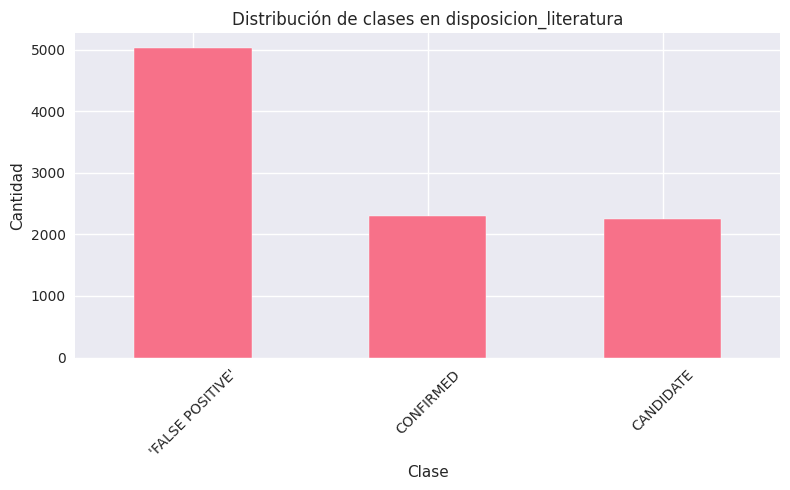

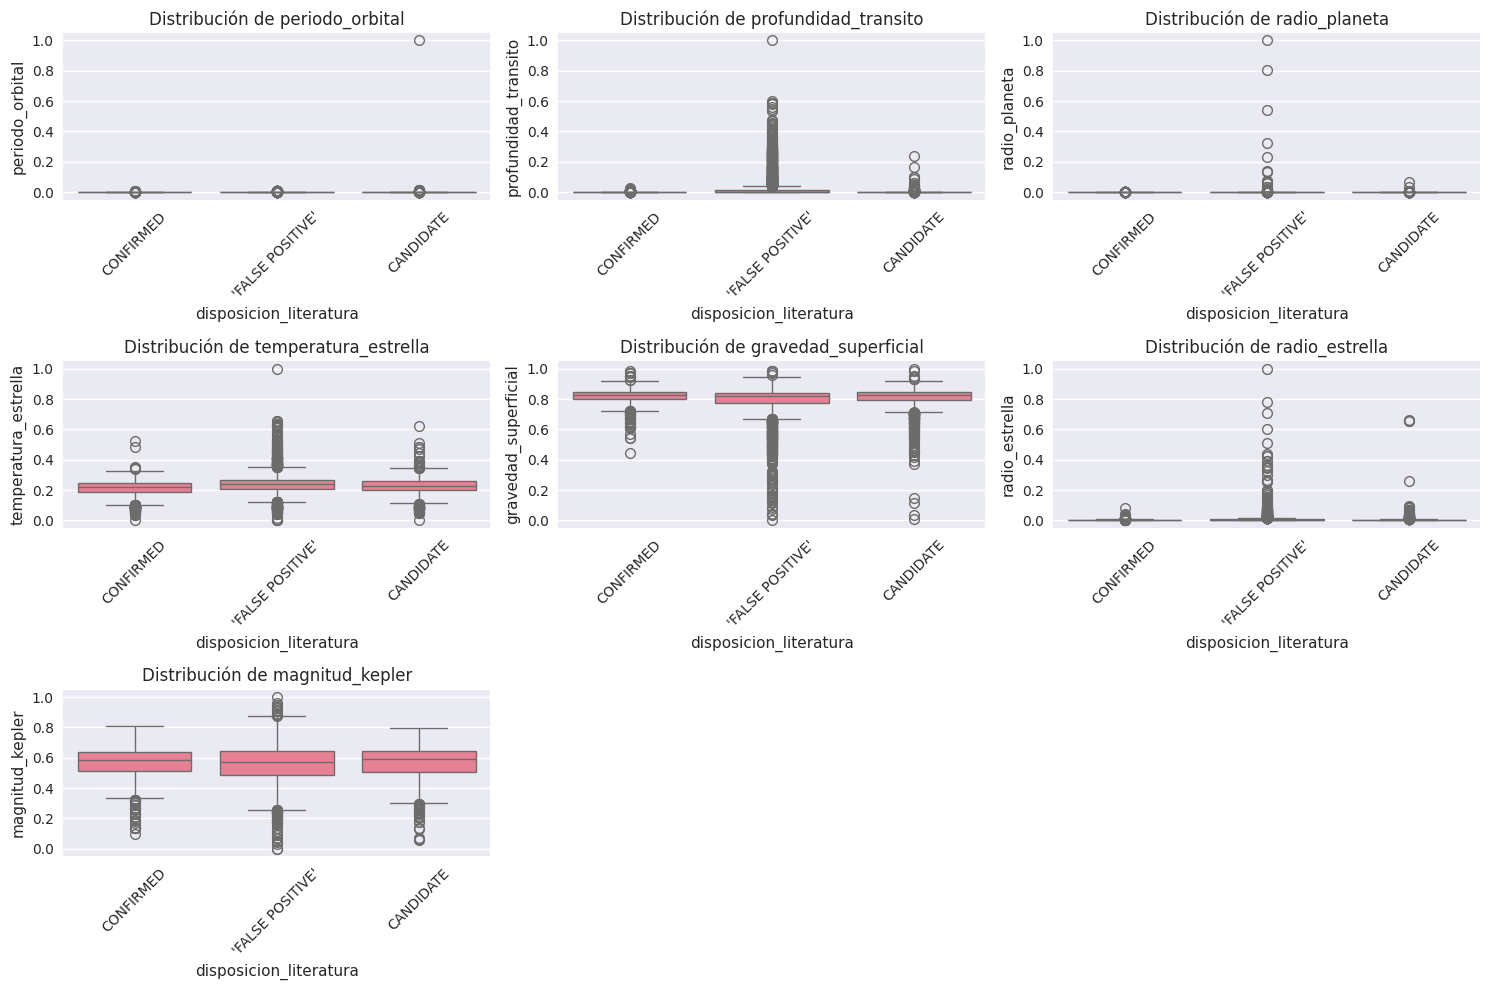

/tmp/ipykernel_5105/3666397474.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/reed/entorno-global/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


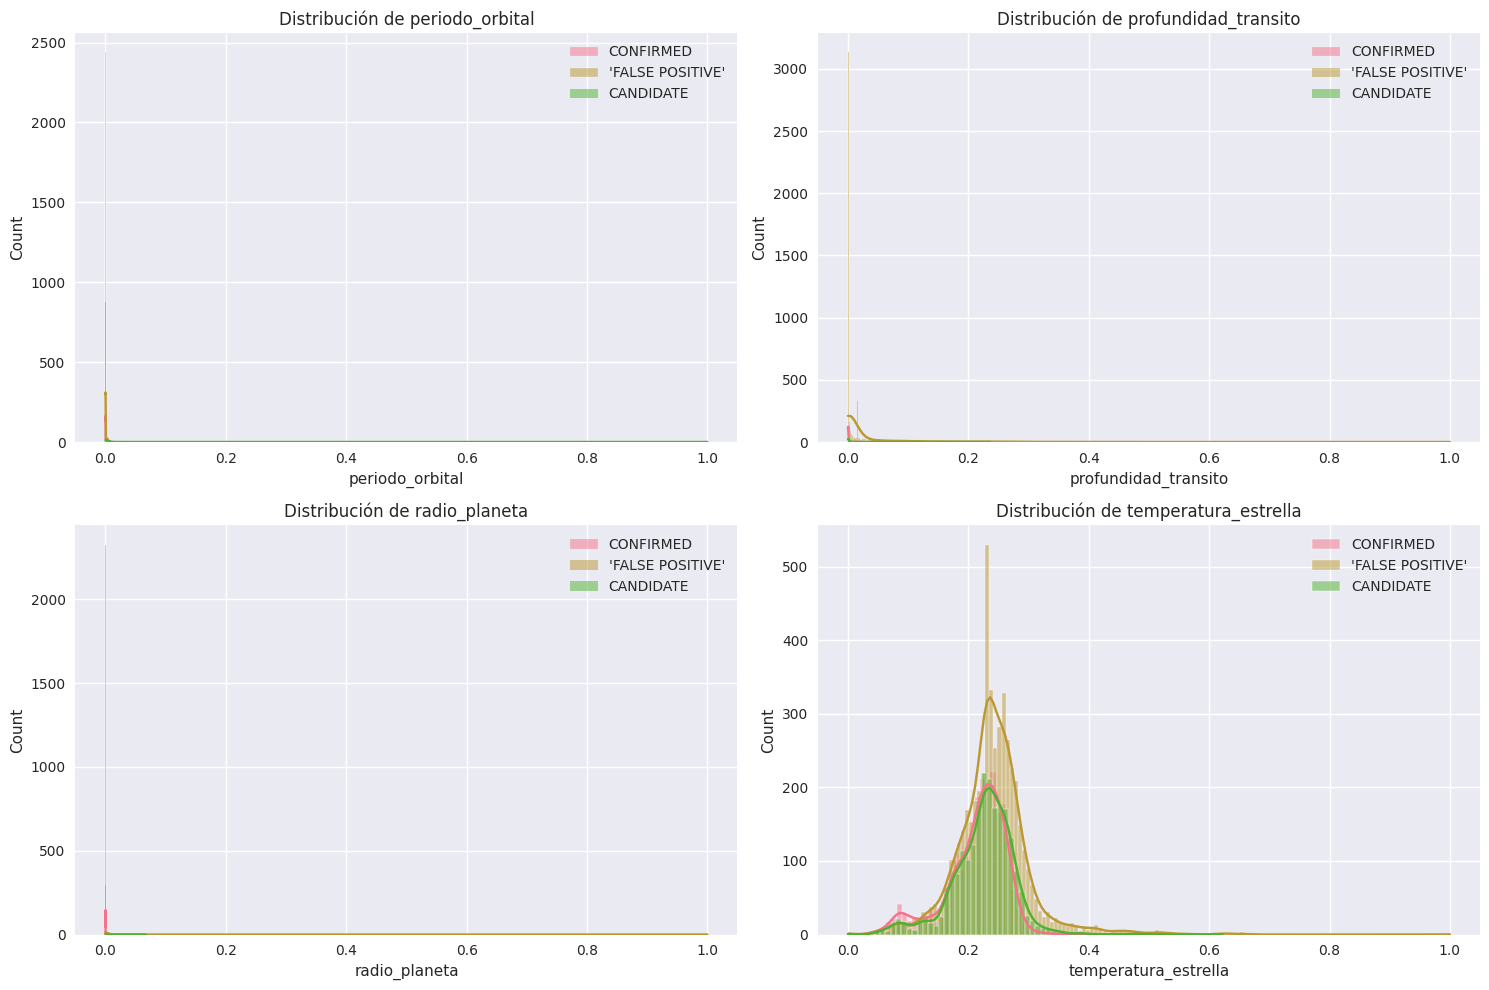

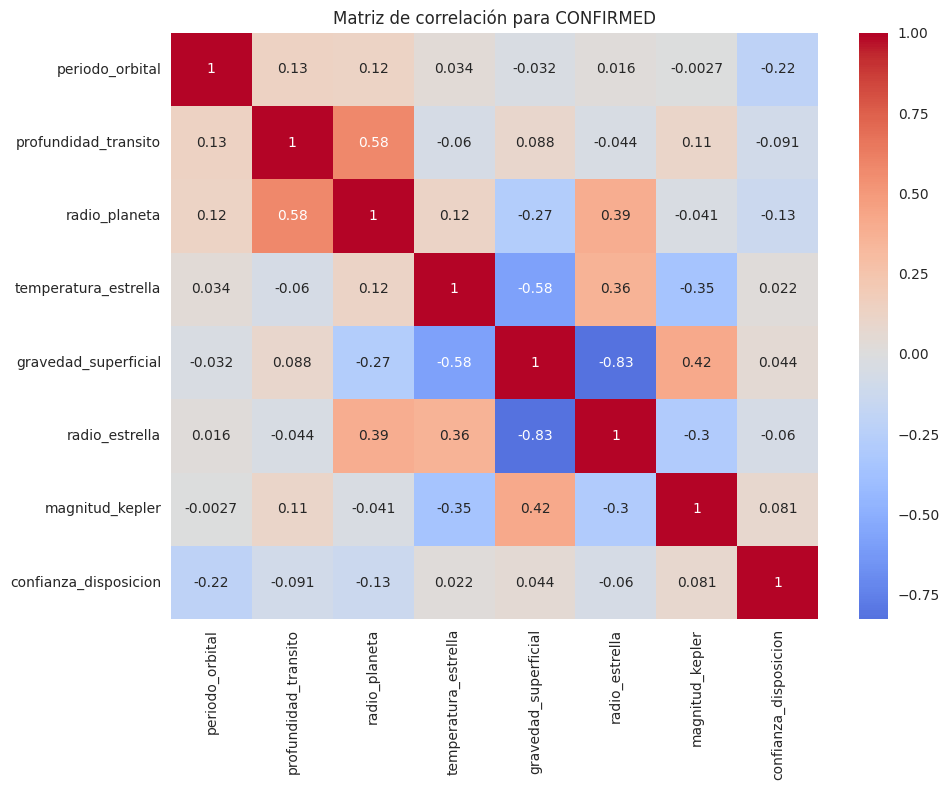

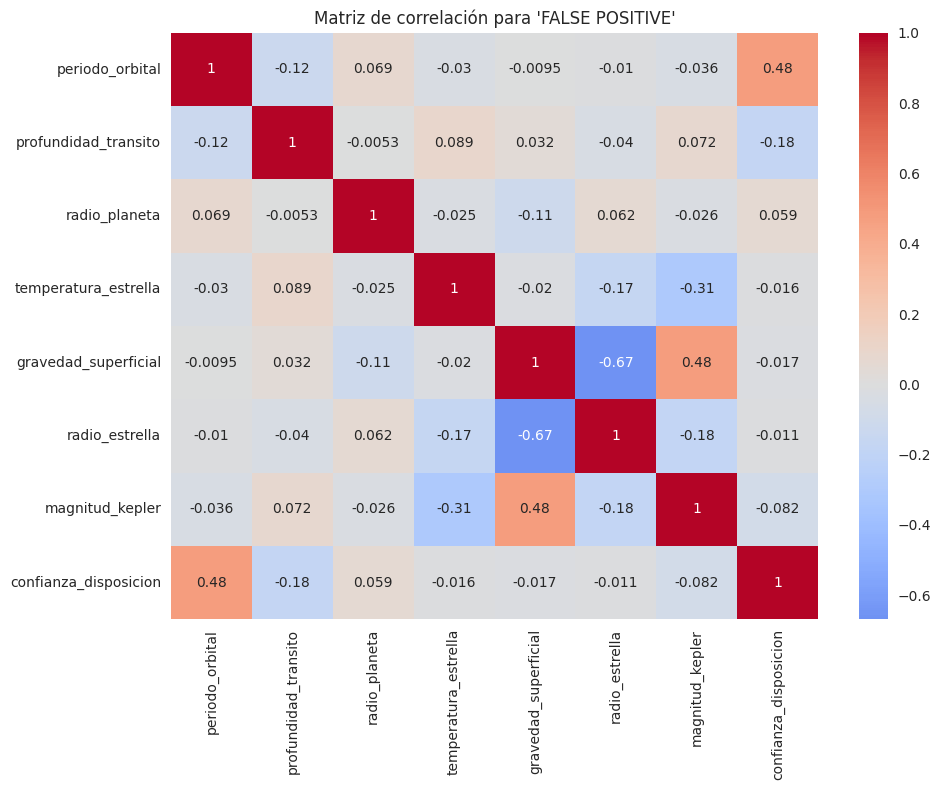

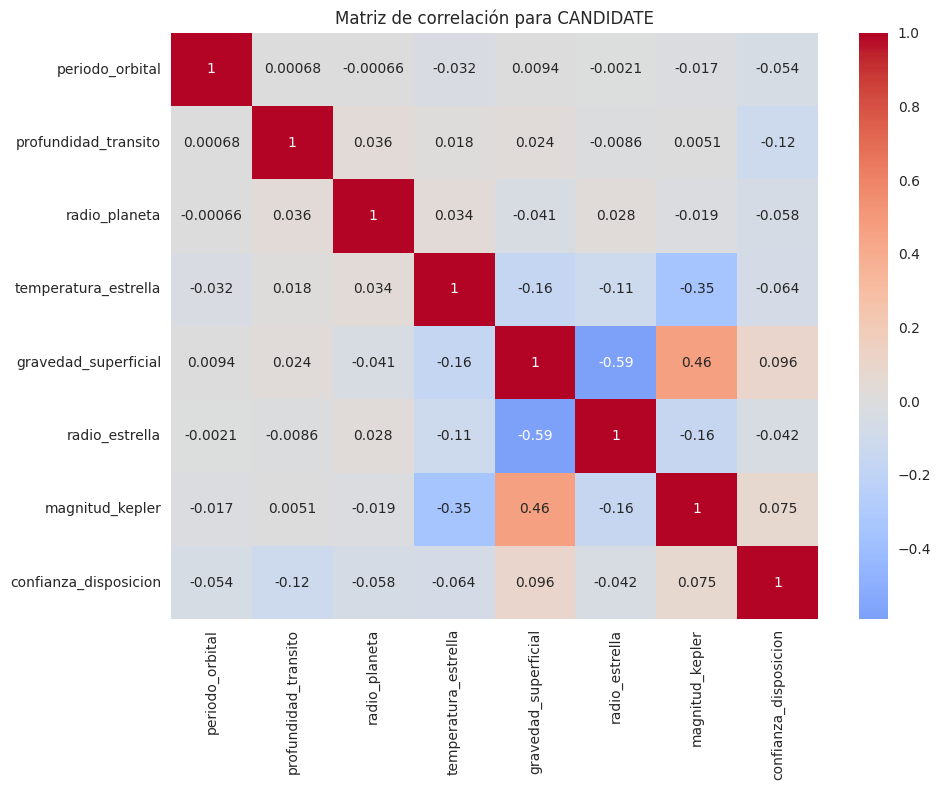

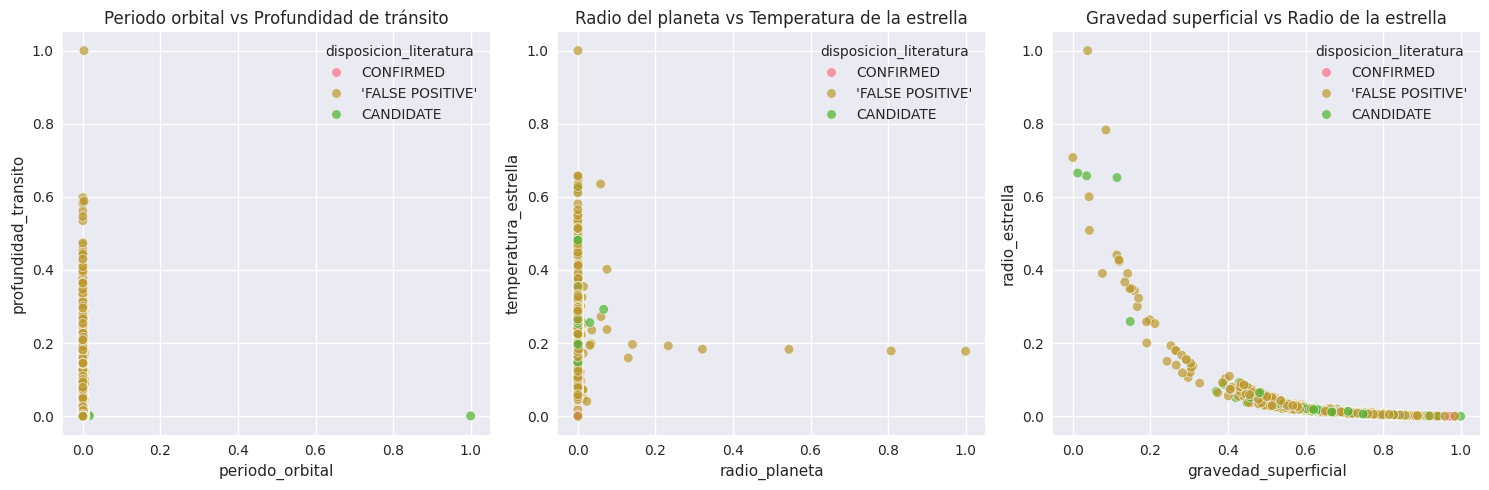

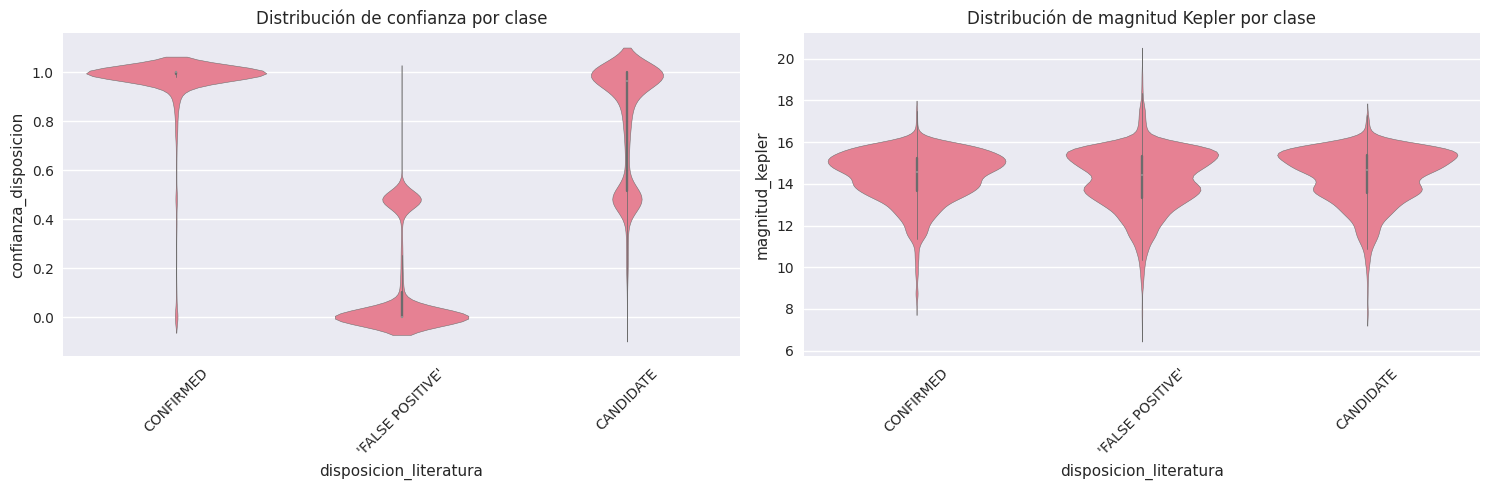

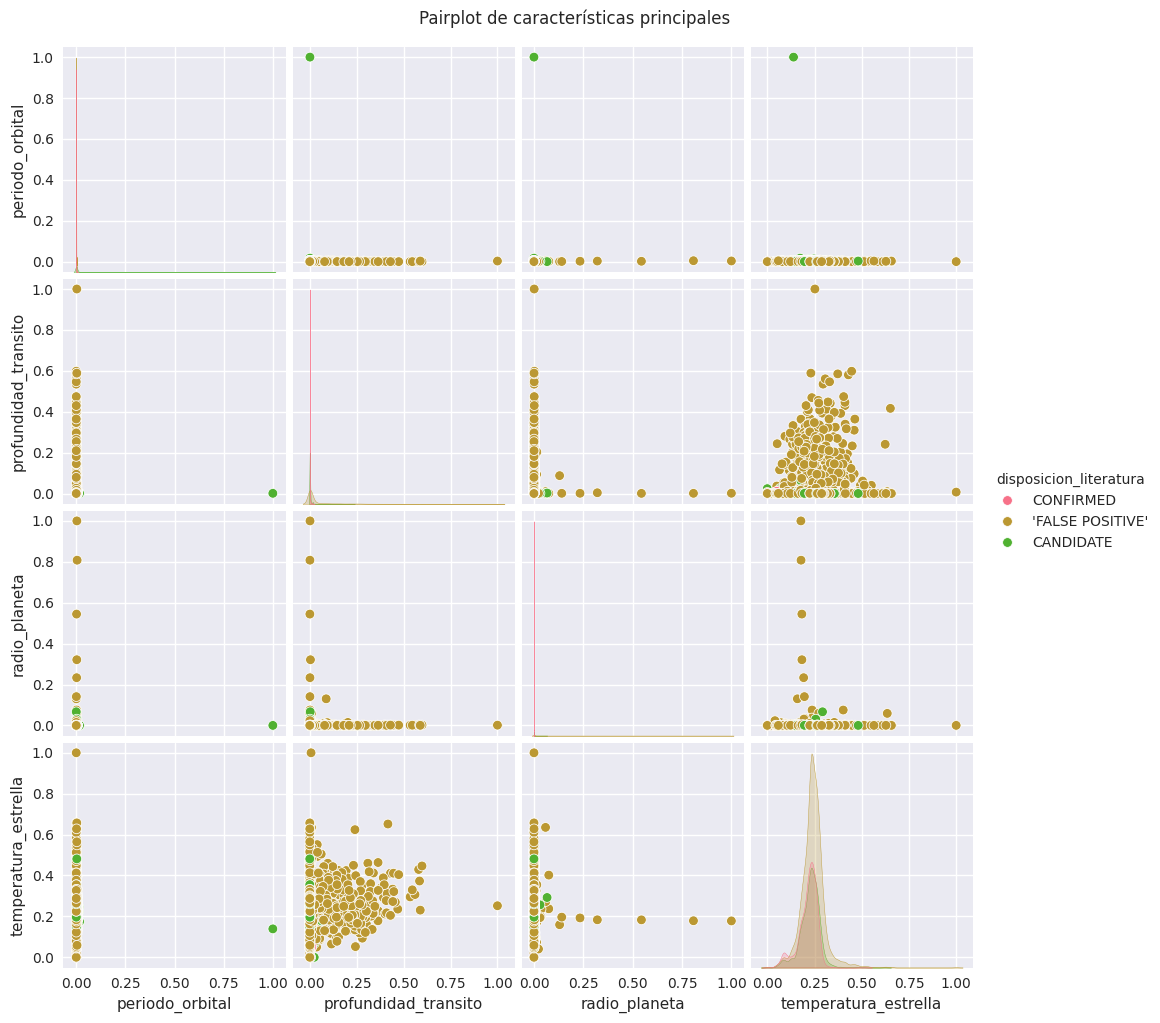

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Distribución de las clases
plt.figure(figsize=(8, 5))
dt['disposicion_literatura'].value_counts().plot(kind='bar')
plt.title('Distribución de clases en disposicion_literatura')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Boxplots de características numéricas por clase
numeric_cols = ['periodo_orbital', 'profundidad_transito', 'radio_planeta',
                'temperatura_estrella', 'gravedad_superficial', 'radio_estrella',
                'magnitud_kepler']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='disposicion_literatura', y=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Histogramas de características seleccionadas por clase
features_to_plot = ['periodo_orbital', 'profundidad_transito', 'radio_planeta', 'temperatura_estrella']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    for category in dt['disposicion_literatura'].unique():
        sns.histplot(df[df['disposicion_literatura'] == category][feature],
                     label=category, alpha=0.5, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

# 4. Matriz de correlación para cada clase
corr_cols = ['periodo_orbital', 'profundidad_transito', 'radio_planeta',
             'temperatura_estrella', 'gravedad_superficial', 'radio_estrella',
             'magnitud_kepler', 'confianza_disposicion']

for category in df['disposicion_literatura'].unique():
    plt.figure(figsize=(10, 8))
    corr_matrix = dt[dt['disposicion_literatura'] == category][corr_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Matriz de correlación para {category}')
    plt.tight_layout()
    plt.show()

# 5. Scatter plots de relaciones clave
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='periodo_orbital', y='profundidad_transito',
                hue='disposicion_literatura', data=dt, alpha=0.7)
plt.title('Periodo orbital vs Profundidad de tránsito')

plt.subplot(1, 3, 2)
sns.scatterplot(x='radio_planeta', y='temperatura_estrella',
                hue='disposicion_literatura', data=dt, alpha=0.7)
plt.title('Radio del planeta vs Temperatura de la estrella')

plt.subplot(1, 3, 3)
sns.scatterplot(x='gravedad_superficial', y='radio_estrella',
                hue='disposicion_literatura', data=dt, alpha=0.7)
plt.title('Gravedad superficial vs Radio de la estrella')

plt.tight_layout()
plt.show()

# 6. Violin plots para comparar distribuciones
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='disposicion_literatura', y='confianza_disposicion', data=dt)
plt.title('Distribución de confianza por clase')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(x='disposicion_literatura', y='magnitud_kepler', data=dt)
plt.title('Distribución de magnitud Kepler por clase')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 7. Pairplot de características seleccionadas
sns.pairplot(dt[['disposicion_literatura', 'periodo_orbital', 'profundidad_transito',
                 'radio_planeta', 'temperatura_estrella']],
             hue='disposicion_literatura', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot de características principales', y=1.02)
plt.show()

## Entrenamiento de la red neuronal


In [24]:
# verificamos la dimensiones
print(X_train_final.shape, y_train.shape)
print(X_test_final.shape, y_test.shape)


(7651, 4) (7651,)
(1913, 4) (1913,)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Asume que X_train_final, X_test_final, y_train, y_test están definidos
# Aplica SMOTE para desbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Entrena la red neuronal
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                      solver='adam', random_state=42, max_iter=1000,
                      warm_start=True, verbose=False)

# Registra pérdida y precisión por iteración
train_loss = []
train_accuracy = []
test_accuracy = []
iterations = list(range(1, 1001, 50))  # Evalúa cada 50 iteraciones

for i in iterations:
    model.max_iter = i
    model.fit(X_train_balanced, y_train_balanced)
    train_loss.append(model.loss_)  # Pérdida en la última iteración
    train_accuracy.append(accuracy_score(y_train_balanced, model.predict(X_train_balanced)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test_final)))


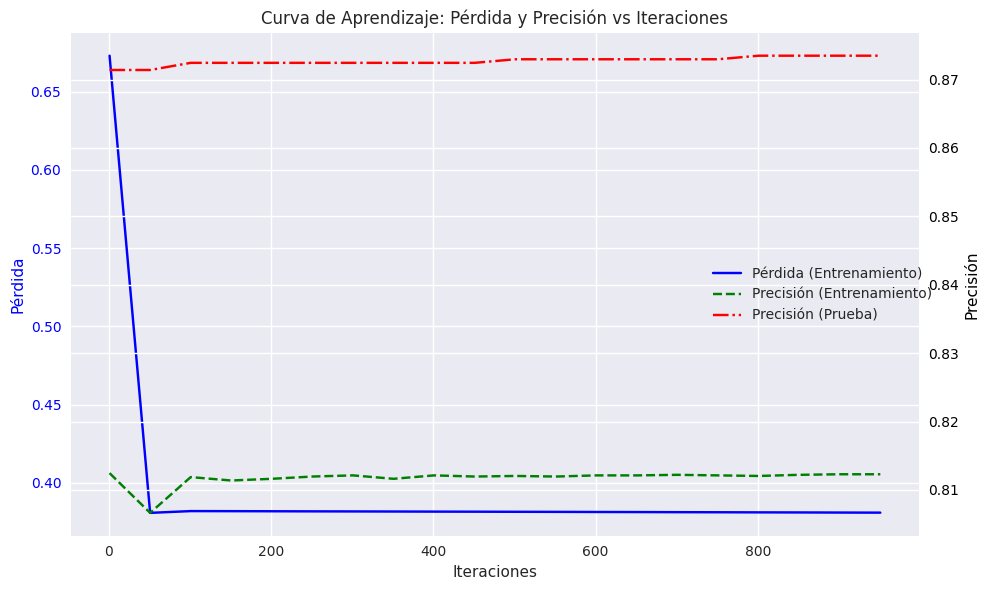

Precisión final en entrenamiento: 0.8122872561228726
Precisión final en prueba: 0.8734971249346576


In [26]:
# Grafica
fig, ax1 = plt.subplots(figsize=(10, 6))

# Curva de pérdida
ax1.plot(iterations, train_loss, label='Pérdida (Entrenamiento)', color='blue')
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('Pérdida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Curva de Aprendizaje: Pérdida y Precisión vs Iteraciones')

# Curva de precisión
ax2 = ax1.twinx()
ax2.plot(iterations, train_accuracy, label='Precisión (Entrenamiento)', color='green', linestyle='--')
ax2.plot(iterations, test_accuracy, label='Precisión (Prueba)', color='red', linestyle='-.')
ax2.set_ylabel('Precisión', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Leyendas
fig.legend(loc='center right', bbox_to_anchor=(0.95, 0.5))
plt.tight_layout()
plt.savefig('training_curve_exoplanets.png')
plt.show()

# Imprime métricas finales
print("Precisión final en entrenamiento:", train_accuracy[-1])
print("Precisión final en prueba:", test_accuracy[-1])


# Análisis Matemático de LDA Basado en el Código

El siguiente análisis explica matemáticamente cómo funciona el Análisis Discriminante Lineal (LDA, por sus siglas en inglés) según la implementación proporcionada en el código. Nos enfocaremos en las fórmulas clave que describen cada paso del proceso.

## 1. Configuración Inicial y Preparación de Datos
Se definen las columnas numéricas (`numeric_cols`) y one-hot (`one_hot_cols`) del DataFrame `df`. Los datos se convierten a matrices numpy:
- $ X $: Matriz de $ n \times p $ donde $ n $ es el número de muestras y $ p $ el número de características (17 numéricas + 2 one-hot).
- $ y $: Vector de etiquetas con $ n $ elementos.

La codificación de etiquetas se realiza como:
- $ y_{\text{encoded}}[i] = \text{class_map}[y[i]] $, donde $ \text{class_map} $ asigna un índice único a cada clase.

## 2. División Estratificada
La función `stratified_split` divide $ X $ y $ y $ en conjuntos de entrenamiento y prueba:
- Para cada clase $ c $, se obtienen índices $ I_c = \{ i \mid y[i] = c \} $.
- Se seleccionan $ \lfloor (1 - \text{test_size}) \cdot |I_c| \rfloor $ índices para entrenamiento y el resto para prueba.

## 3. Implementación de LDA
La función `compute_lda` realiza el LDA con las siguientes fórmulas:

### 3.1. Cálculo de Medias
- Media global: $$ \mu = \frac{1}{n} \sum_{i=1}^n X_i $$
- Media por clase $ c $: $$ \mu_c = \frac{1}{|I_c|} \sum_{i \in I_c} X_i $$

### 3.2. Matriz de Dispersión Intra-clase ($ S_w $)
La matriz $ S_w $ mide la dispersión dentro de cada clase:
- Diferencia por clase: $ d_{i,c} = X_i - \mu_c $ para $ i \in I_c $.
- Matriz de covarianza intra-clase: $$ S_w = \sum_{c=1}^k \sum_{i \in I_c} d_{i,c} d_{i,c}^T $$
- Regularización: $$ S_w \leftarrow S_w + \text{reg_param} \cdot I $$ (donde $ \text{reg_param} = 10^{-4} $ y $ I $ es la matriz identidad).

### 3.3. Matriz de Dispersión Inter-clase ($ S_b $)
La matriz $ S_b $ mide la separación entre clases:
- Diferencia de medias: $ \delta_c = \mu_c - \mu $.
- Matriz inter-clase: $$ S_b = \sum_{c=1}^k n_c (\delta_c \delta_c^T) $$ donde $ n_c = |I_c| $.

### 3.4. Resolución del Problema de Autovalores
El objetivo de LDA es maximizar la relación $ \frac{S_b}{S_w} $. Esto se resuelve como un problema de autovalores generalizado:
- Calcular $ S_w^{-1/2} $ usando SVD: $$ S_w = U \Sigma V^T \rightarrow S_w^{-1/2} = U \Sigma^{-1/2} V^T $$.
- Transformar: $$ M = S_w^{-1/2} S_b S_w^{-1/2} $$.
- Autovalores y autovectores: $$ M v = \lambda v $$.
- Seleccionar $ W $ con los $ n_{\text{components}} $ autovectores correspondientes a los mayores autovalores.

Si falla, se usa la pseudoinversa:
- $ A = S_w^+ S_b $, donde $ S_w^+ $ es la pseudoinversa.
- Resolver: $$ A v = \lambda v $$.

### 3.5. Proyección de Datos
La transformación de los datos se realiza como:
- $ X_{\text{lda}} = (X - \mu) W  $, donde $ W $ contiene los $ n_{\text{components}} $ vectores propios.

## 4. Resultados y Verificación
- Varianza explicada: $$ \text{explained_variance_ratio}[i] = \frac{\lambda_i}{\sum \lambda_j} $$.
- Formas de los datos transformados: $ X_{\text{train_lda}} $ y $ X_{\text{test_lda}} $ tienen $ n_{\text{components}} $ columnas.
- Trazas: $$ \text{tr}(S_w) = \sum \text{diag}(S_w), \quad \text{tr}(S_b) = \sum \text{diag}(S_b) $$.

## Conclusión
El LDA maximiza la separabilidad inter-clase ($ S_b $) mientras minimiza la dispersión intra-clase ($ S_w $) mediante la proyección lineal $ W $, como se deriva de las fórmulas anteriores. La regularización y el manejo de singularidades aseguran robustez numérica.

In [13]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Asume que 'df' es tu DataFrame preprocesado
# Columnas numéricas normalizadas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Columnas one-hot de disposicion_kepler
one_hot_cols = [
    'disposicion_kepler_\'FALSE POSITIVE\'', 'disposicion_kepler_CANDIDATE'
]

# Características (numéricas + one-hot de disposicion_kepler)
X = df[numeric_cols + one_hot_cols]
y = df['disposicion_literatura']  # Variable objetivo (categórica)

# Codifica y
le = LabelEncoder()
y = le.fit_transform(y)  # Convierte CONFIRMED, CANDIDATE, FALSE POSITIVE a 0, 1, 2

# Divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Máximo 2 componentes (3 clases - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Verifica varianza explicada
print(lda.explained_variance_ratio_)

# Crea DataFrames con componentes LDA
df_train_lda = pd.DataFrame(X_train_lda, columns=['LDA1', 'LDA2'])
df_test_lda = pd.DataFrame(X_test_lda, columns=['LDA1', 'LDA2'])

# Alinea índices
df_train_lda.index = X_train.index
df_test_lda.index = X_test.index

# Concatena con columnas one-hot de disposicion_kepler
X_train_final = pd.concat([df_train_lda, df[one_hot_cols].loc[X_train.index]], axis=1)
X_test_final = pd.concat([df_test_lda, df[one_hot_cols].loc[X_test.index]], axis=1)

[0.99656468 0.00343532]


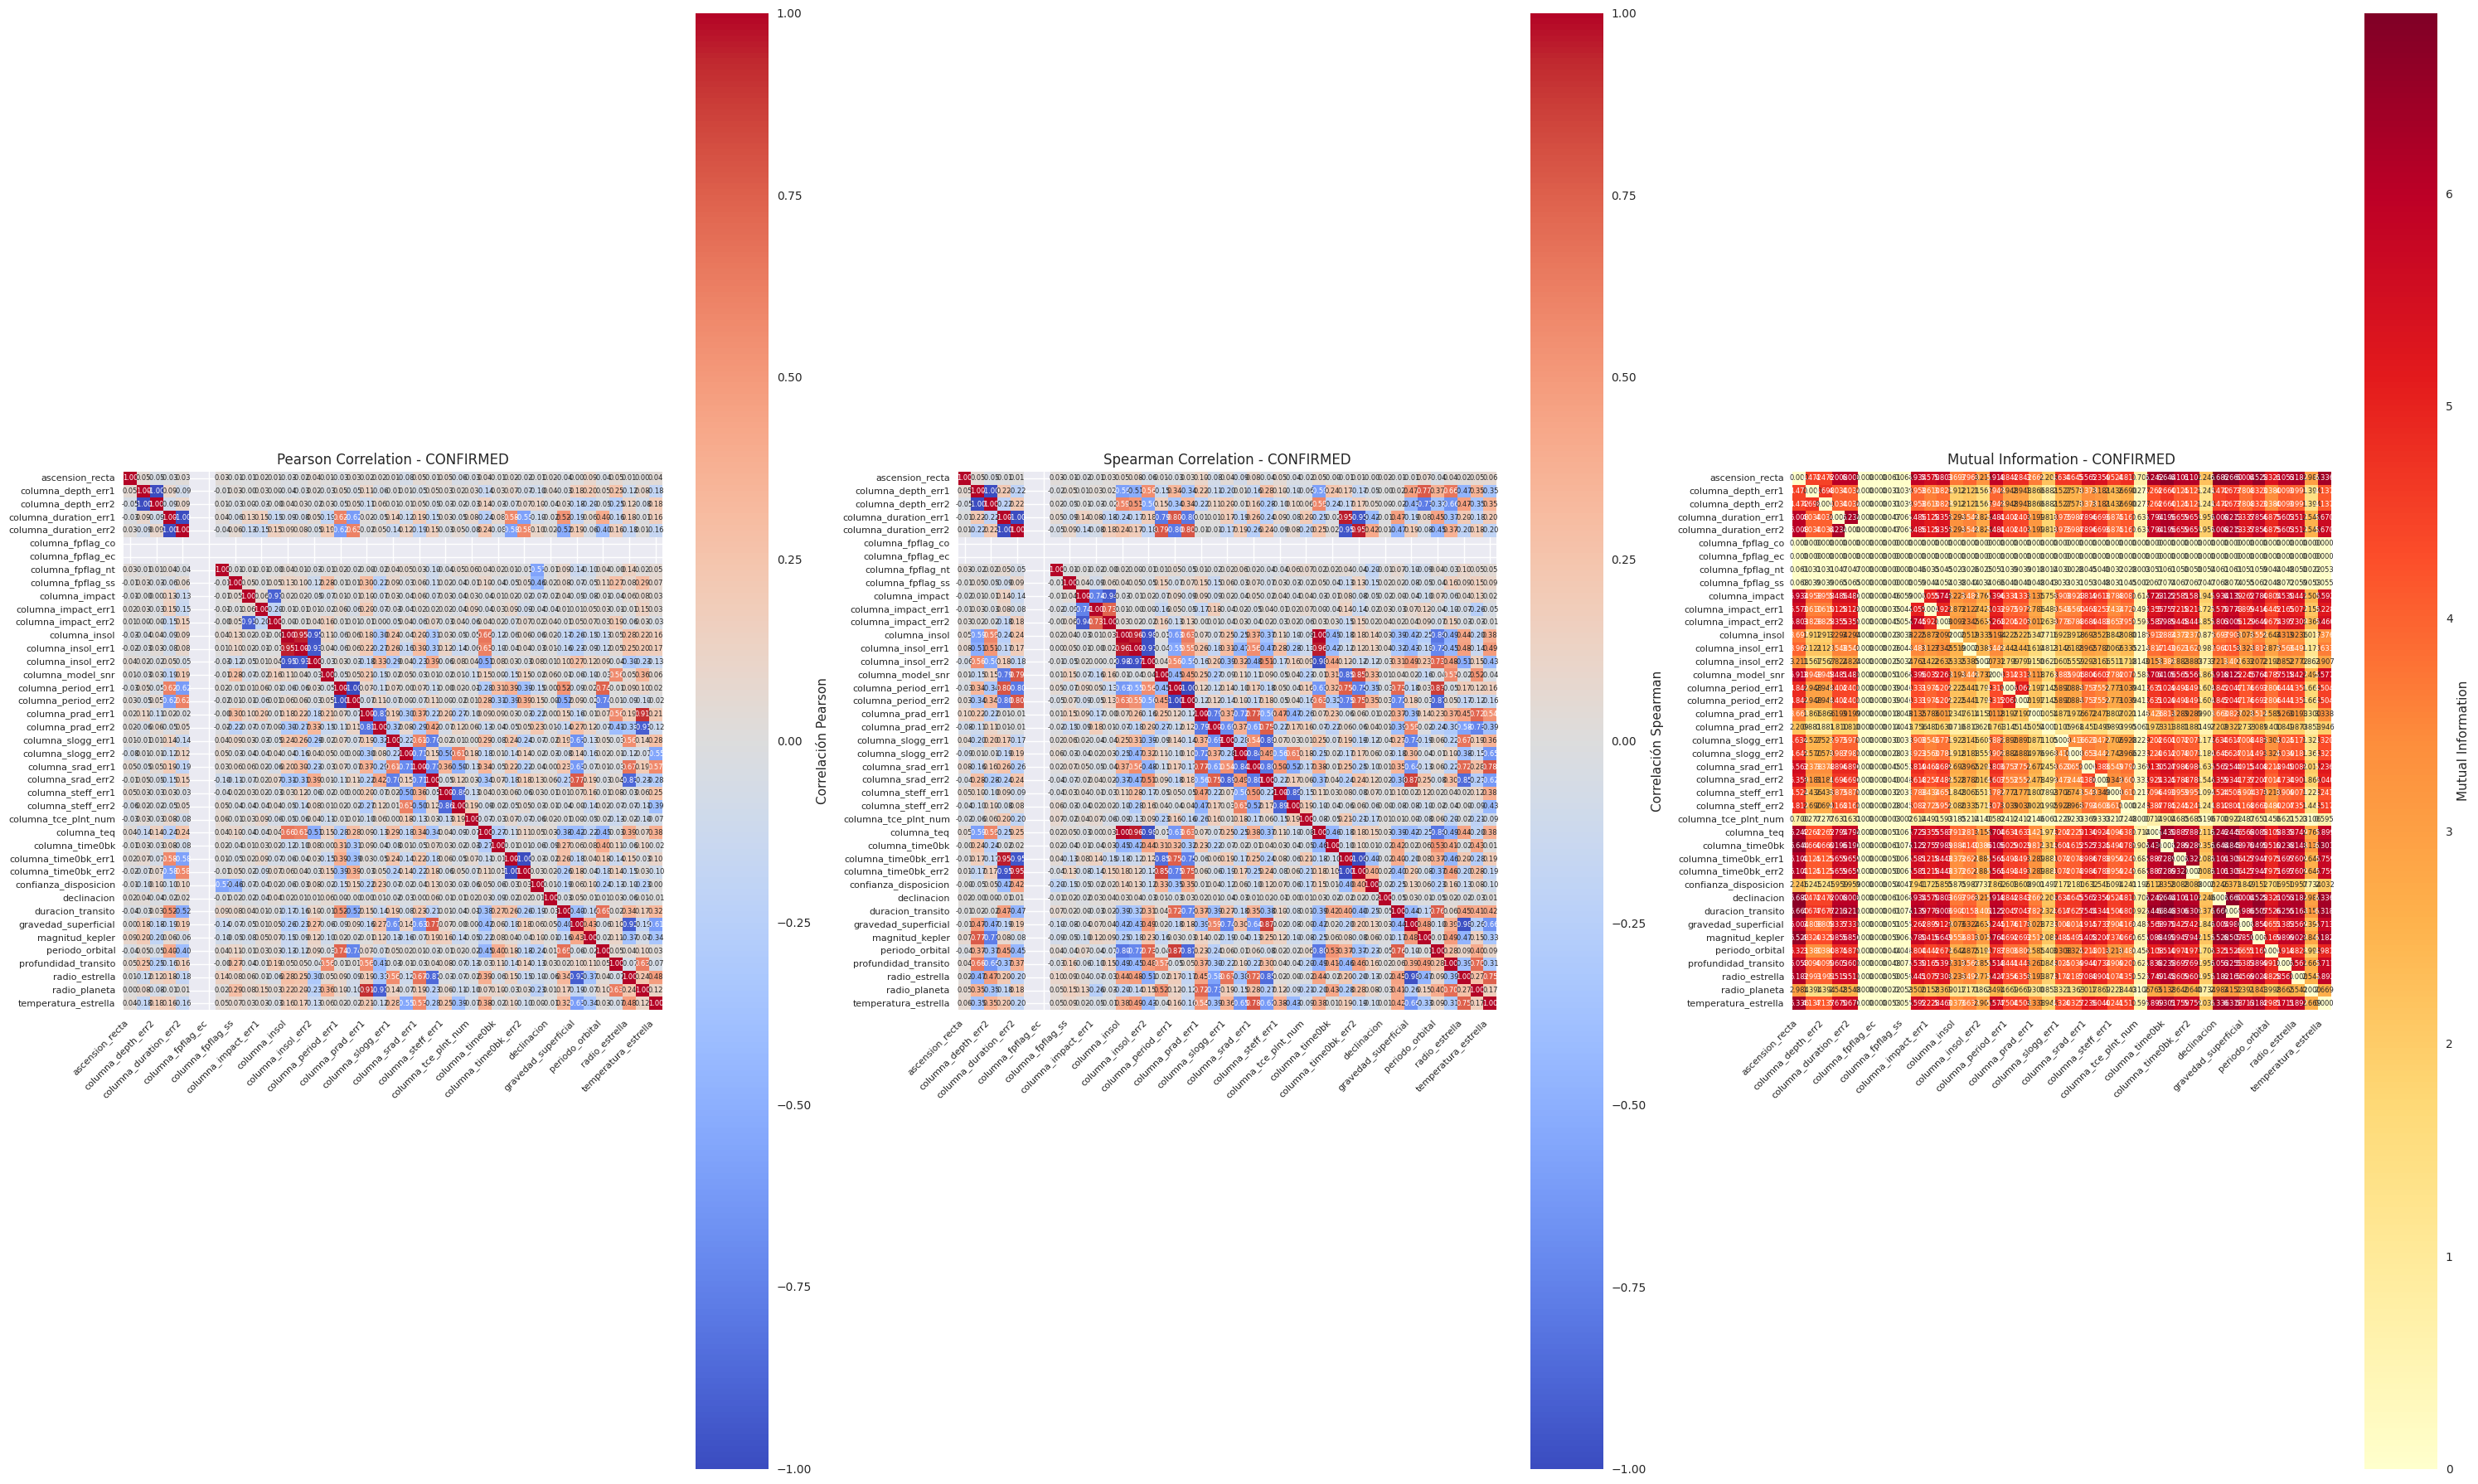

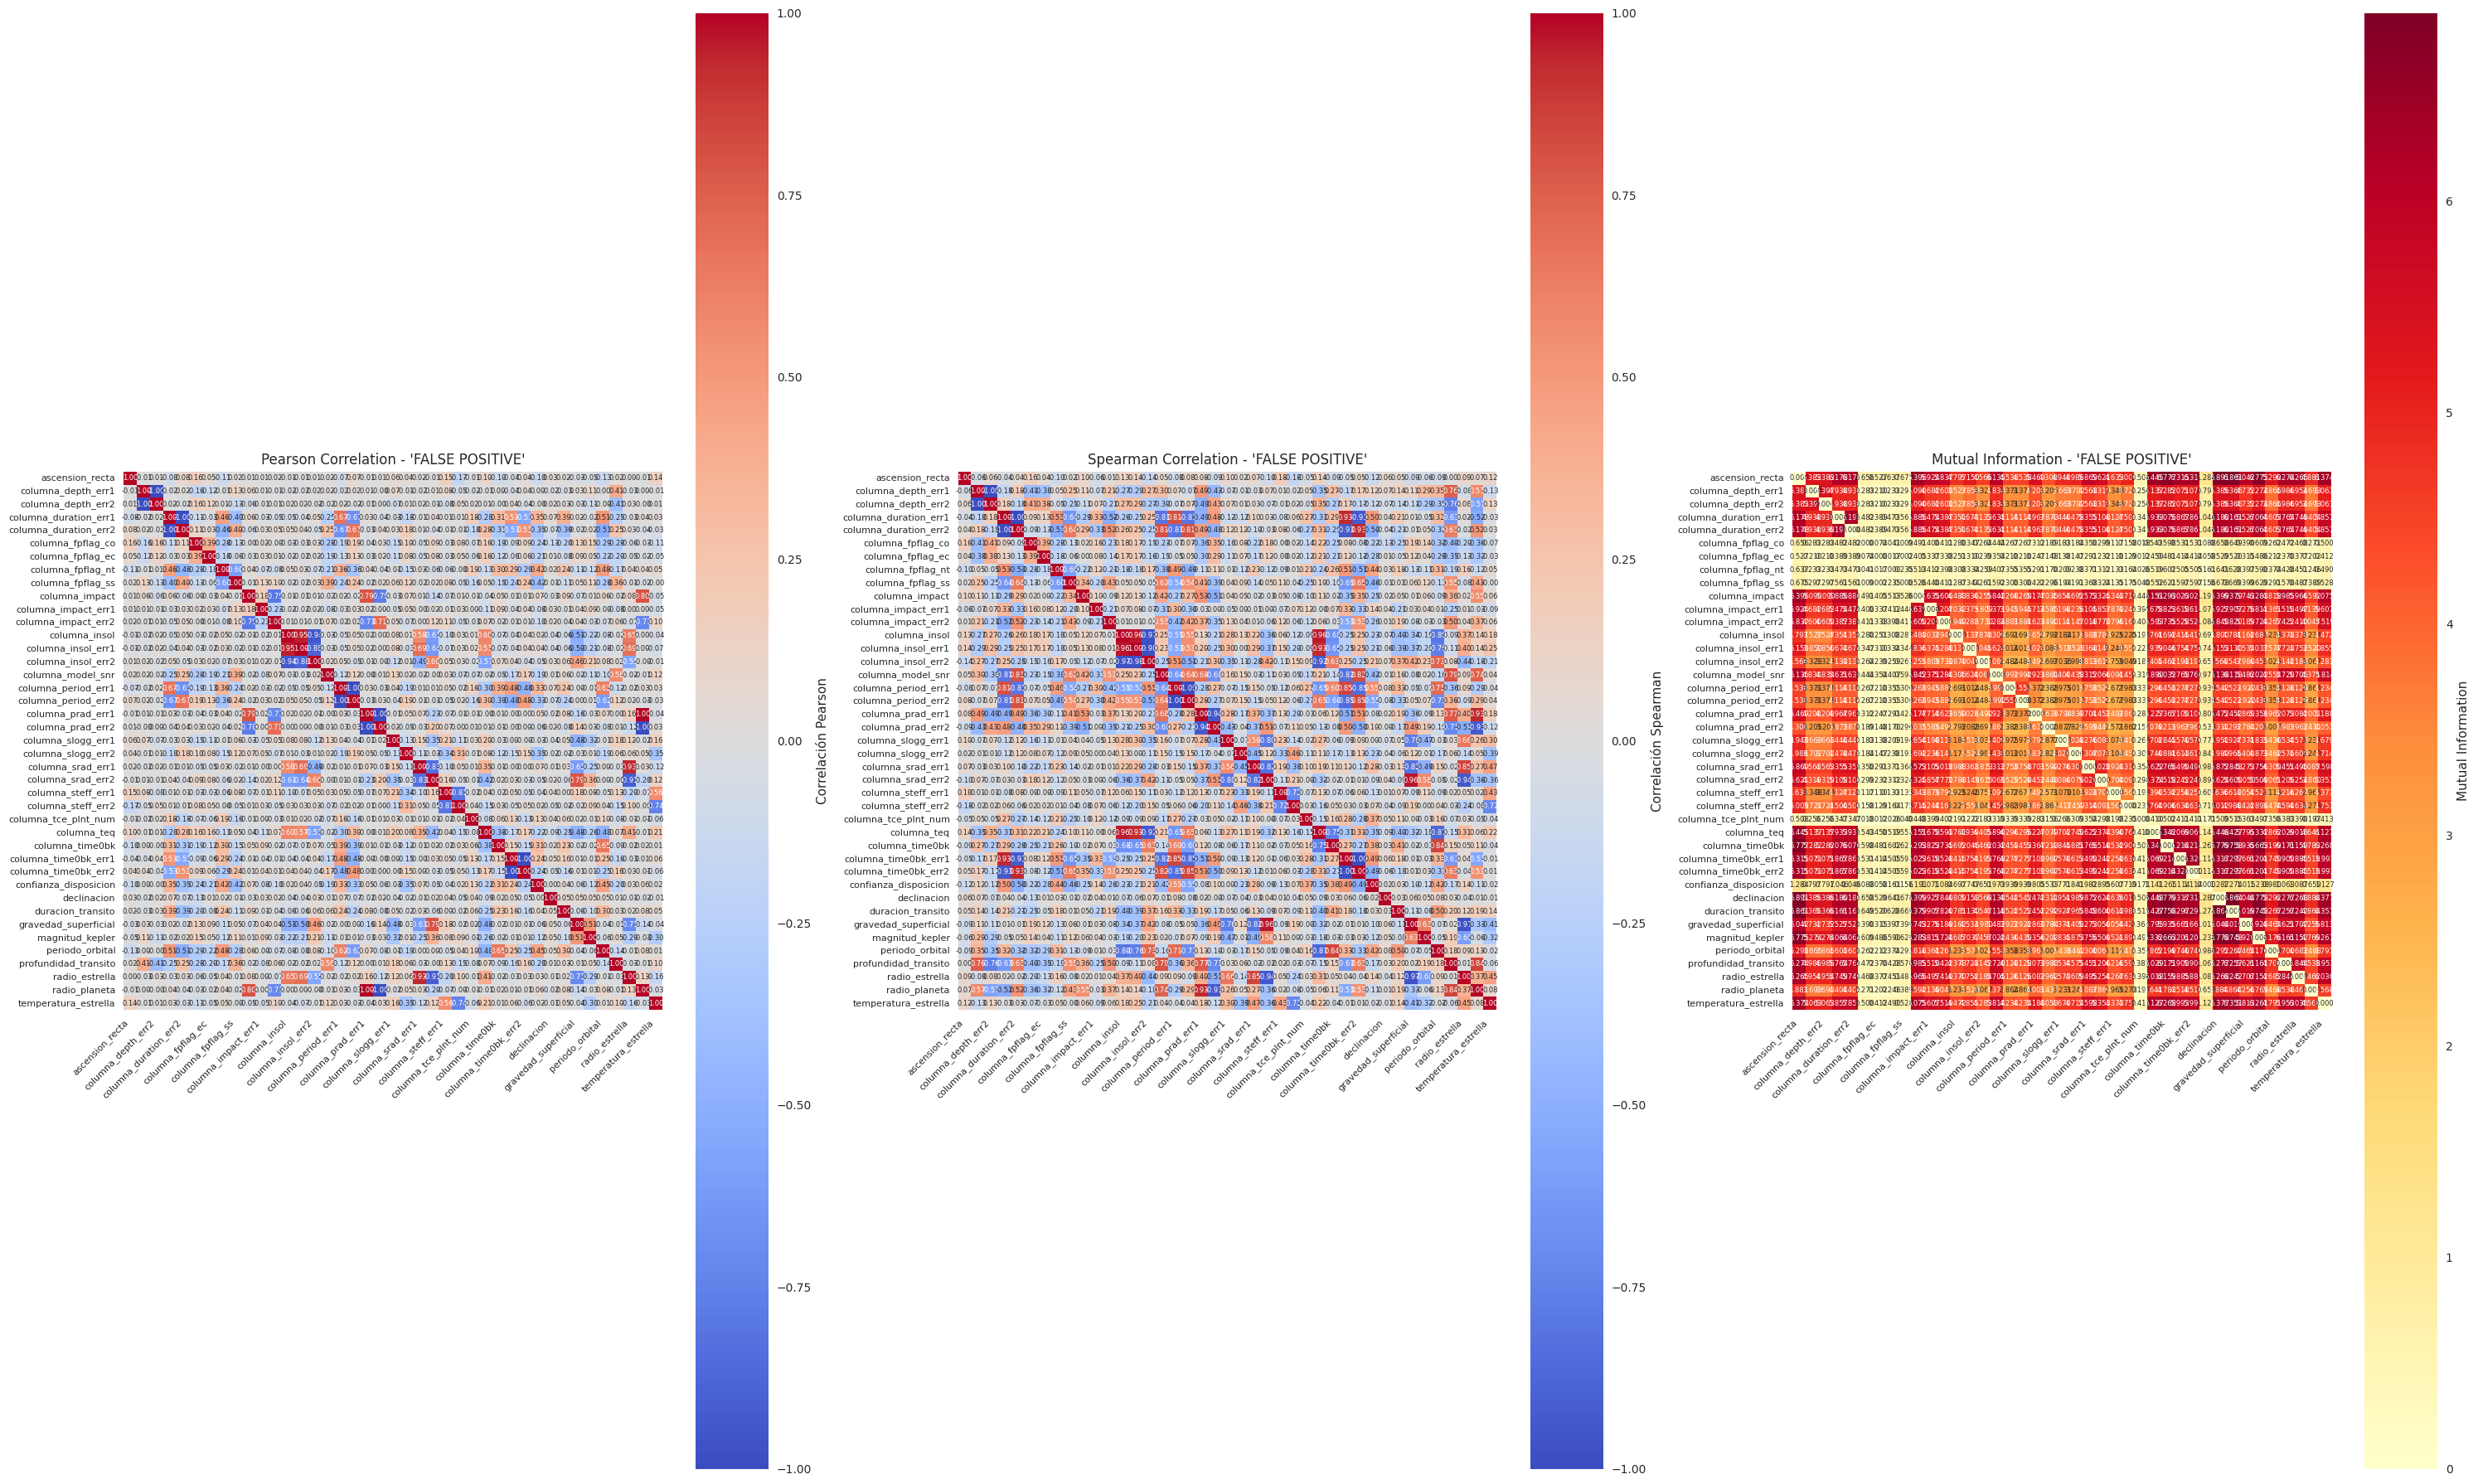

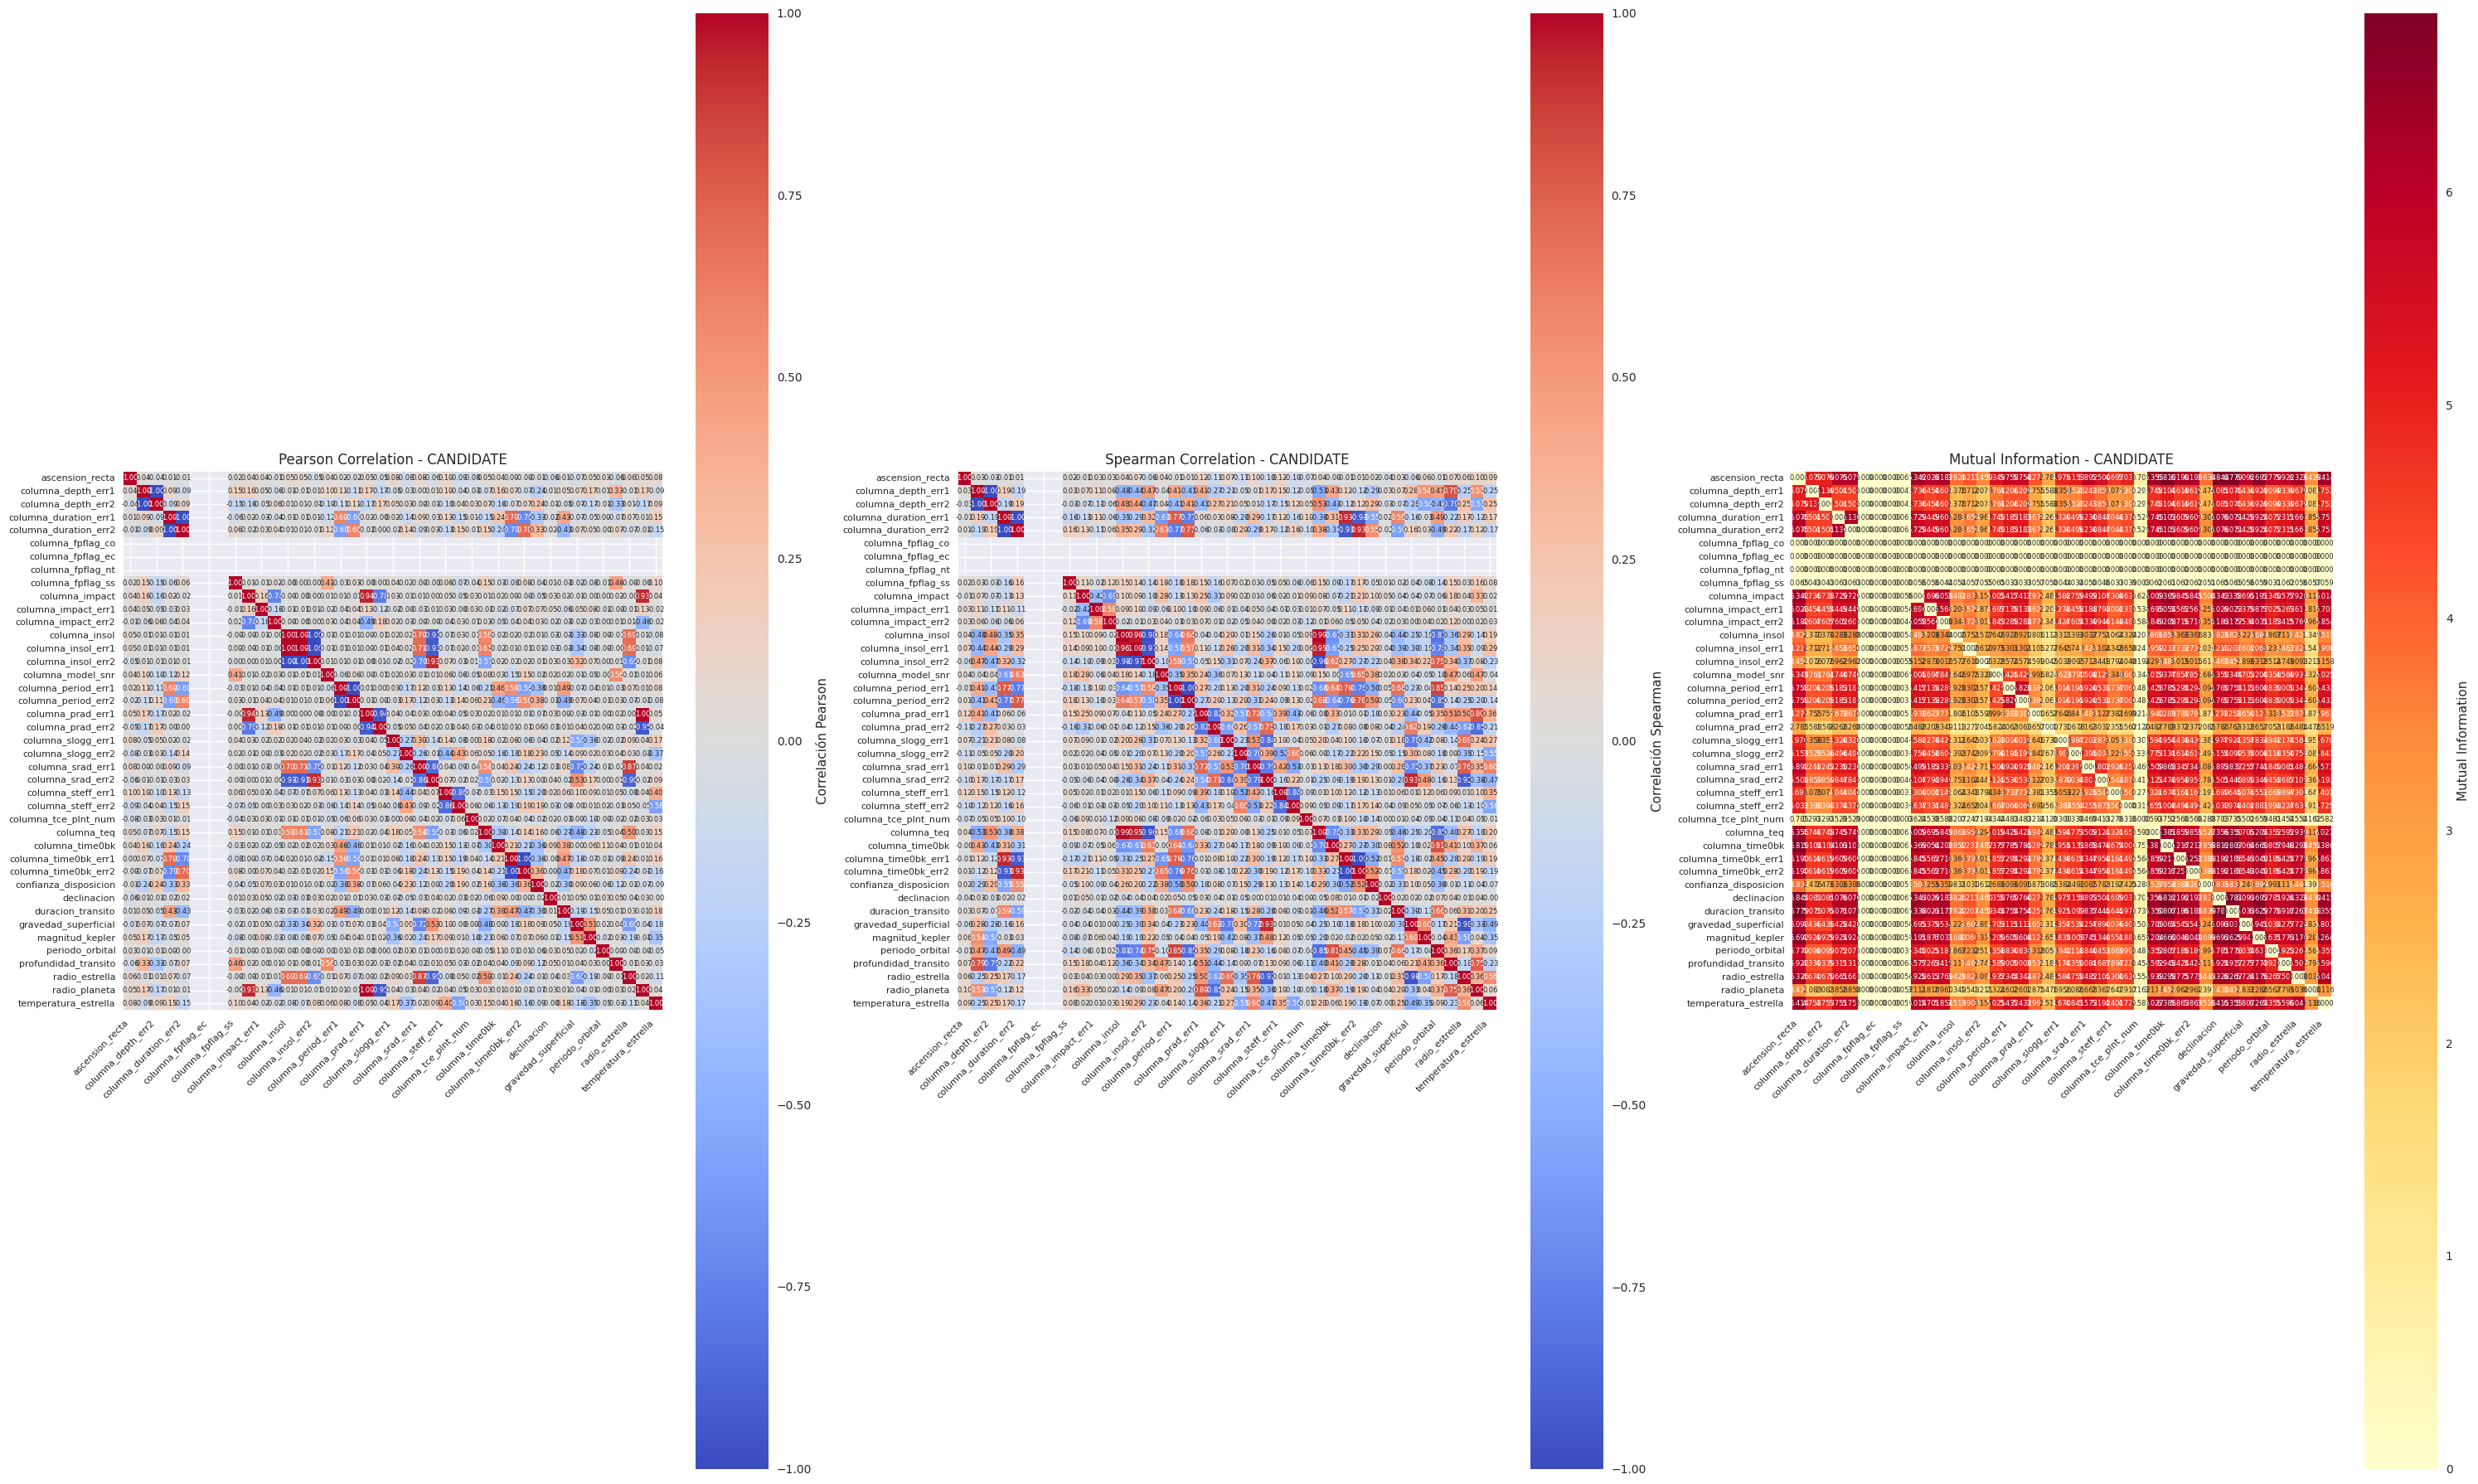

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
import warnings

# Suprimir las advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Lista de todas las columnas numéricas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Función para calcular correlación mutua
def calculate_mutual_information(df):
    mi_matrix = np.zeros((len(numeric_cols), len(numeric_cols)))
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            if i != j:
                mi = mutual_info_score(df[numeric_cols[i]], df[numeric_cols[j]])
                mi_matrix[i, j] = mi
            else:
                mi_matrix[i, j] = 0
    return pd.DataFrame(mi_matrix, index=numeric_cols, columns=numeric_cols)


# Generar matrices por clase
for category in dt['disposicion_literatura'].unique():
    # Filtrar datos por clase y submuestrear si es necesario
    df_category = dt[dt['disposicion_literatura'] == category][numeric_cols]
    if len(df_category) > 1000:
        df_category = df_category.sample(n=1000, random_state=42)

    # Calcular matrices de correlación
    corr_pearson = df_category.corr(method='pearson')
    corr_spearman = df_category.corr(method='spearman')
    mi_matrix = calculate_mutual_information(df_category)

    # Crear figura con 2 columnas
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 18), gridspec_kw={'width_ratios': [1, 1, 1]})

    # Heatmap Pearson con anotaciones
    sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
                cbar_kws={'label': 'Correlación Pearson'}, ax=ax1, annot_kws={"size": 6})
    ax1.set_title(f'Pearson Correlation - {category}')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=8)

    # Heatmap Spearman con anotaciones
    sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
                cbar_kws={'label': 'Correlación Spearman'}, ax=ax2, annot_kws={"size": 6})
    ax2.set_title(f'Spearman Correlation - {category}')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=8)

    # Heatmap Mutual Information con anotaciones
    sns.heatmap(mi_matrix, annot=True, fmt='.3f', cmap='YlOrRd', square=True,
                cbar_kws={'label': 'Mutual Information'}, ax=ax3, annot_kws={"size": 6})
    ax3.set_title(f'Mutual Information - {category}')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=8)

    plt.tight_layout()
    plt.savefig(f'correlation_matrices_{category}.png')
    plt.show()


Combinando ascension_recta y columna_depth_err1 con mi (valor: 4.472)
Combinando ascension_recta y columna_depth_err2 con mi (valor: 4.472)
Combinando ascension_recta y columna_duration_err1 con mi (valor: 6.008)
Columnas originales: 43
Columnas combinadas añadidas: 3
Total de columnas en dt_combined: 46
Nuevas columnas: ['ascension_recta_columna_depth_err1_combined', 'ascension_recta_columna_depth_err2_combined', 'ascension_recta_columna_duration_err1_combined']
Dataset con columnas combinadas guardado como 'dataset_with_combined_columns.csv'


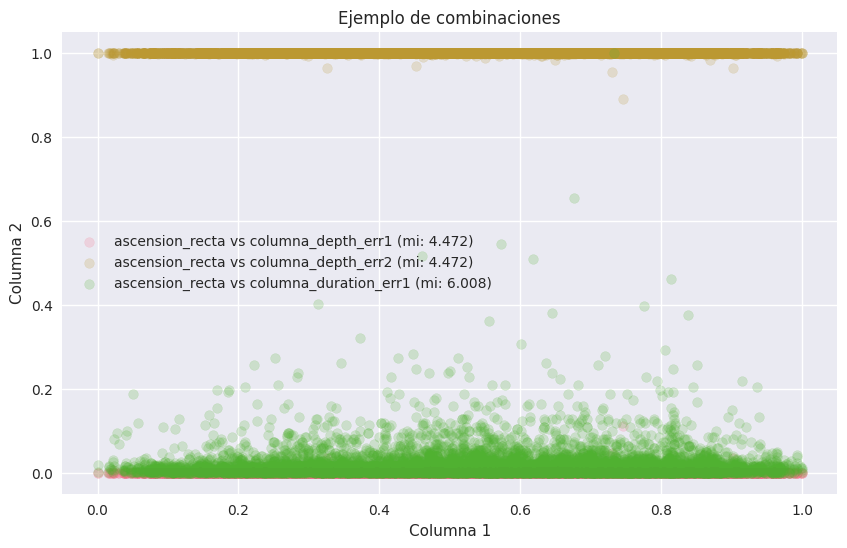

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LinearRegression
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=Warning, module="pandas")

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Lista de todas las columnas numéricas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Filtrar datos para la clase CONFIRMED
df_confirmed = dt[dt['disposicion_literatura'] == 'CONFIRMED'][numeric_cols]
if len(df_confirmed) > 1000:
    df_confirmed = df_confirmed.sample(n=1000, random_state=42)

# Calcular matrices de correlación para CONFIRMED
corr_pearson = df_confirmed.corr(method='pearson')
corr_spearman = df_confirmed.corr(method='spearman')


# Calcular Mutual Information
def calculate_mutual_information(df):
    mi_matrix = np.zeros((len(numeric_cols), len(numeric_cols)))
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            if i != j:
                mi = mutual_info_score(df[numeric_cols[i]], df[numeric_cols[j]])
                mi_matrix[i, j] = mi
            else:
                mi_matrix[i, j] = 0
    return pd.DataFrame(mi_matrix, index=numeric_cols, columns=numeric_cols)


mi_matrix = calculate_mutual_information(df_confirmed)

# Identificar el mejor par por correlación
best_pairs = {}
for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col1, col2 = numeric_cols[i], numeric_cols[j]
        pearson_val = abs(corr_pearson.loc[col1, col2])
        spearman_val = abs(corr_spearman.loc[col1, col2])
        mi_val = mi_matrix.loc[col1, col2]
        max_corr = max(pearson_val, spearman_val, mi_val)
        if max_corr > 0.7:  # Umbral para alta correlación
            if pearson_val == max_corr:
                best_pairs[(col1, col2)] = ('pearson', pearson_val)
            elif spearman_val == max_corr:
                best_pairs[(col1, col2)] = ('spearman', spearman_val)
            else:
                best_pairs[(col1, col2)] = ('mi', mi_val)

# Limitar el número de combinaciones (e.g., máximo 5)
max_combinations = 3
best_pairs = dict(list(best_pairs.items())[:max_combinations])

# Combinar columnas en un DataFrame temporal
combined_cols = {}
for (col1, col2), (method, corr_val) in best_pairs.items():
    print(f"Combinando {col1} y {col2} con {method} (valor: {corr_val:.3f})")
    if method == 'pearson' or method == 'spearman':
        X = df_confirmed[[col1]].values
        y = df_confirmed[col2].values
        model = LinearRegression()
        model.fit(X, y)
        combined_cols[f'{col1}_{col2}_combined'] = model.predict(dt[[col1]].values)
    else:  # Mutual Information
        combined_cols[f'{col1}_{col2}_combined'] = (dt[col1] * corr_val + dt[col2] * corr_val) / (2 * corr_val)

# Convertir a DataFrame y concatenar
if combined_cols:
    combined_df = pd.DataFrame(combined_cols)
    dt_combined = pd.concat([dt, combined_df], axis=1)
else:
    dt_combined = dt.copy()

# Mostrar resumen de columnas
print(f"Columnas originales: {len(dt.columns)}")
print(f"Columnas combinadas añadidas: {len(combined_cols)}")
print(f"Total de columnas en dt_combined: {len(dt_combined.columns)}")
print("Nuevas columnas:", list(combined_cols.keys()))

# Guardar el nuevo DataFrame
dt_combined.to_csv('dataset_with_combined_columns.csv', index=False)
print("Dataset con columnas combinadas guardado como 'dataset_with_combined_columns.csv'")

# Visualizar una muestra de las combinaciones (opcional)
if best_pairs:
    plt.figure(figsize=(10, 6))
    for (col1, col2), (method, corr_val) in list(best_pairs.items())[:3]:  # Mostrar solo las primeras 3
        plt.scatter(dt[col1], dt[col2], alpha=0.2, label=f'{col1} vs {col2} ({method}: {corr_val:.3f})')
    plt.xlabel('Columna 1')
    plt.ylabel('Columna 2')
    plt.title('Ejemplo de combinaciones')
    plt.legend()
    plt.grid(True)
    plt.savefig('combined_pairs_example.png')
    plt.show()

In [11]:
import pandas as pd

dt = pd.read_csv('dataset_with_replaced_columns.csv')
# dt

# dt.describe()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   disposicion_literatura  9564 non-null   object 
 1   disposicion_kepler      9564 non-null   object 
 2   confianza_disposicion   9564 non-null   float64
 3   columna_fpflag_nt       9564 non-null   int64  
 4   columna_fpflag_ss       9564 non-null   int64  
 5   columna_fpflag_co       9564 non-null   int64  
 6   columna_fpflag_ec       9564 non-null   int64  
 7   columna_period_err1     9564 non-null   float64
 8   columna_time0bk         9564 non-null   float64
 9   columna_time0bk_err1    9564 non-null   float64
 10  columna_impact          9564 non-null   float64
 11  columna_impact_err1     9564 non-null   float64
 12  columna_duration_err1   9564 non-null   float64
 13  columna_depth_err1      9564 non-null   float64
 14  columna_prad_err1       9564 non-null   

Combinando columna_time0bk y duracion_transito con mi (valor: 6.848)
Combinando ascension_recta y declinacion con mi (valor: 6.682)
Combinando columna_time0bk_err1 y columna_time0bk_err2 con mi (valor: 6.327)
Combinando columna_duration_err1 y columna_duration_err2 con mi (valor: 6.234)
Combinando magnitud_kepler y temperatura_estrella con mi (valor: 6.182)
Combinando columna_teq y profundidad_transito con mi (valor: 5.838)
Combinando columna_impact y columna_impact_err2 con mi (valor: 5.745)
Combinando gravedad_superficial y radio_estrella con mi (valor: 5.569)
Combinando columna_period_err1 y columna_period_err2 con mi (valor: 5.067)
Combinando columna_impact_err1 y columna_model_snr con mi (valor: 5.032)
Combinando columna_depth_err1 y columna_depth_err2 con mi (valor: 4.698)
Combinando columna_srad_err1 y columna_srad_err2 con mi (valor: 4.386)
Combinando columna_steff_err1 y columna_steff_err2 con mi (valor: 3.617)
Combinando columna_slogg_err1 y columna_slogg_err2 con mi (valor: 

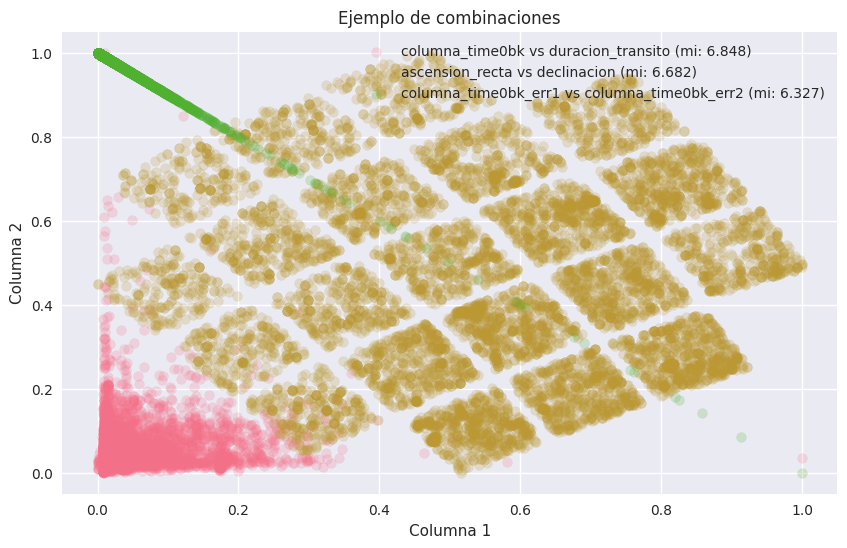

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LinearRegression
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=Warning, module="pandas")

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Lista de todas las columnas numéricas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Filtrar datos para la clase CONFIRMED
df_confirmed = dt[dt['disposicion_literatura'] == 'CONFIRMED'][numeric_cols]
if len(df_confirmed) > 1000:
    df_confirmed = df_confirmed.sample(n=1000, random_state=42)

# Calcular matrices de correlación para CONFIRMED
corr_pearson = df_confirmed.corr(method='pearson')
corr_spearman = df_confirmed.corr(method='spearman')


# Calcular Mutual Information
def calculate_mutual_information(df):
    mi_matrix = np.zeros((len(numeric_cols), len(numeric_cols)))
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            if i != j:
                mi = mutual_info_score(df[numeric_cols[i]], df[numeric_cols[j]])
                mi_matrix[i, j] = mi
            else:
                mi_matrix[i, j] = 0
    return pd.DataFrame(mi_matrix, index=numeric_cols, columns=numeric_cols)


mi_matrix = calculate_mutual_information(df_confirmed)

# Encontrar y combinar las mejores correlaciones (> 0.75)
remaining_cols = numeric_cols.copy()
combined_cols = {}  # Diccionario para almacenar valores combinados y metadata
while remaining_cols:
    max_corr = 0
    best_pair = None
    best_method = None

    for i, col1 in enumerate(remaining_cols):
        for col2 in remaining_cols[i + 1:]:
            pearson_val = abs(corr_pearson.loc[col1, col2])
            spearman_val = abs(corr_spearman.loc[col1, col2])
            mi_val = mi_matrix.loc[col1, col2]
            curr_max = max(pearson_val, spearman_val, mi_val)
            if curr_max > max_corr:
                max_corr = curr_max
                best_pair = (col1, col2)
                if pearson_val == curr_max:
                    best_method = 'pearson'
                elif spearman_val == curr_max:
                    best_method = 'spearman'
                else:
                    best_method = 'mi'

    if max_corr > 0.75 and best_pair:
        col1, col2 = best_pair
        print(f"Combinando {col1} y {col2} con {best_method} (valor: {max_corr:.3f})")

        if best_method in ['pearson', 'spearman']:
            X = df_confirmed[[col1]].values
            y = df_confirmed[col2].values
            model = LinearRegression()
            model.fit(X, y)
            combined_vals = model.predict(dt[[col1]].values)
        else:  # Mutual Information
            combined_vals = (dt[col1] * max_corr + dt[col2] * max_corr) / (2 * max_corr)

        combined_cols[(col1, col2)] = {'values': combined_vals, 'method': best_method, 'corr_val': max_corr}
        remaining_cols.remove(col1)
        remaining_cols.remove(col2)
    else:
        break  # Salir si no hay más correlaciones > 0.75

# Crear el DataFrame combinado
if combined_cols:
    combined_df = pd.DataFrame(
        {f'{col1}_{col2}_combined': data['values'] for (col1, col2), data in combined_cols.items()})
    # Usar todas las columnas originales y reemplazar las combinadas
    dt_base = dt.copy()
    for (col1, col2), data in combined_cols.items():
        if col1 in dt_base.columns and col2 in dt_base.columns:
            dt_base = dt_base.drop(columns=[col2])  # Eliminar la segunda columna
            dt_base[col1] = combined_df[f'{col1}_{col2}_combined']  # Reemplazar col1 con la combinada
    dt_combined = dt_base
else:
    dt_combined = dt.copy()

# Mostrar resumen de columnas
print(f"Columnas originales: {len(dt.columns)}")
print(f"Columnas combinadas: {len(combined_cols)}")
print(f"Total de columnas en dt_combined: {len(dt_combined.columns)}")
print("Columnas restantes:", list(dt_combined.columns))

# Guardar el nuevo DataFrame
dt_combined.to_csv('dataset_with_combined_columns.csv', index=False)
print("Dataset con columnas combinadas guardado como 'dataset_with_combined_columns.csv'")

# Visualizar una muestra de las combinaciones (opcional)
if combined_cols:
    plt.figure(figsize=(10, 6))
    for (col1, col2), data in list(combined_cols.items())[:3]:  # Mostrar solo las primeras 3 combinaciones
        plt.scatter(dt[col1], dt[col2], alpha=0.2, label=f'{col1} vs {col2} ({data["method"]}: {data["corr_val"]:.3f})')
    plt.xlabel('Columna 1')
    plt.ylabel('Columna 2')
    plt.title('Ejemplo de combinaciones')
    plt.legend()
    plt.grid(True)
    plt.savefig('combined_pairs_example.png')
    plt.show()

In [13]:
import pandas as pd

dr = pd.read_csv('dataset_with_combined_columns.csv')
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   disposicion_literatura  9564 non-null   object 
 1   disposicion_kepler      9564 non-null   object 
 2   confianza_disposicion   9564 non-null   float64
 3   columna_fpflag_nt       9564 non-null   int64  
 4   columna_fpflag_ss       9564 non-null   int64  
 5   columna_fpflag_co       9564 non-null   int64  
 6   columna_fpflag_ec       9564 non-null   int64  
 7   columna_period_err1     9564 non-null   float64
 8   columna_time0bk         9564 non-null   float64
 9   columna_time0bk_err1    9564 non-null   float64
 10  columna_impact          9564 non-null   float64
 11  columna_impact_err1     9564 non-null   float64
 12  columna_duration_err1   9564 non-null   float64
 13  columna_depth_err1      9564 non-null   float64
 14  columna_prad_err1       9564 non-null   

In [14]:
dr

disposicion_literatura disposicion_kepler  confianza_disposicion  \
0                 CONFIRMED          CANDIDATE                  1.000   
1                 CONFIRMED          CANDIDATE                  0.969   
2          'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
3          'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
4                 CONFIRMED          CANDIDATE                  1.000   
...                     ...                ...                    ...   
9559       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
9560       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   
9561              CANDIDATE          CANDIDATE                  0.497   
9562       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.021   
9563       'FALSE POSITIVE'   'FALSE POSITIVE'                  0.000   

      columna_fpflag_nt  columna_fpflag_ss  columna_fpflag_co  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  1                  0   
3                     0                  1                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
9559                  0                  0                  0   
9560                  0                  1                  1   
9561                  0                  0                  0   
9562                  0                  0                  1   
9563                  0                  0                  1   

      columna_fpflag_ec  columna_period_err1  columna_time0bk  \
0                     0                  0.5         0.028989   
1                     0                  0.5         0.031616   
2                     0                  0.5         0.026711   
3                     0                  0.5         0.026915   
4                     0                  0.5         0.024676   
...                 ...                  ...              ...   
9559                  1                  0.5         0.021417   
9560                  0                  0.5         0.015584   
9561                  0                  0.5         0.015672   
9562                  0                  0.5         0.007250   
9563                  1                  0.5         0.016649   

      columna_time0bk_err1  ...  columna_teq  columna_insol  \
0                      0.5  ...     0.026426       0.500003   
1                      0.5  ...     0.014558       0.500000   
2                      0.5  ...     0.024445       0.500001   
3                      0.5  ...     0.049404       0.500020   
4                      0.5  ...     0.047354       0.500015   
...                    ...  ...          ...            ...   
9559                   0.5  ...     0.030898       0.500001   
9560                   0.5  ...     0.070960       0.500100   
9561                   0.5  ...     0.054073       0.500027   
9562                   0.5  ...     0.074921       0.500097   
9563                   0.5  ...     0.042403       0.500010   

      columna_insol_err1  columna_tce_plnt_num  columna_steff_err1  \
0               0.000039              0.000000            0.536926   
1               0.000209              0.142857            0.536926   
2               0.000080              0.000000            0.566921   
3               0.000098              0.000000            0.566749   
4               0.000130              0.000000            0.565125   
...                  ...                   ...                 ...   
9559            0.000053              0.000000            0.581867   
9560            0.000472              0.000000            0.555705   
9561            0.000218              0.000000            0.559612   
9562            0.000786              0.000000            0.575782   
9563            0.000100              0

Combinando columna_time0bk y duracion_transito con mi (valor: 6.848)
Combinando ascension_recta y declinacion con mi (valor: 6.682)
Combinando columna_time0bk_err1 y columna_time0bk_err2 con mi (valor: 6.327)
Combinando columna_duration_err1 y columna_duration_err2 con mi (valor: 6.234)
Combinando magnitud_kepler y temperatura_estrella con mi (valor: 6.182)
Combinando columna_teq y profundidad_transito con mi (valor: 5.838)
Combinando columna_impact y columna_impact_err2 con mi (valor: 5.745)
Combinando gravedad_superficial y radio_estrella con mi (valor: 5.569)
Combinando columna_period_err1 y columna_period_err2 con mi (valor: 5.067)
Combinando columna_impact_err1 y columna_model_snr con mi (valor: 5.032)
Combinando columna_depth_err1 y columna_depth_err2 con mi (valor: 4.698)
Combinando columna_srad_err1 y columna_srad_err2 con mi (valor: 4.386)
Combinando columna_steff_err1 y columna_steff_err2 con mi (valor: 3.617)
Combinando columna_slogg_err1 y columna_slogg_err2 con mi (valor: 

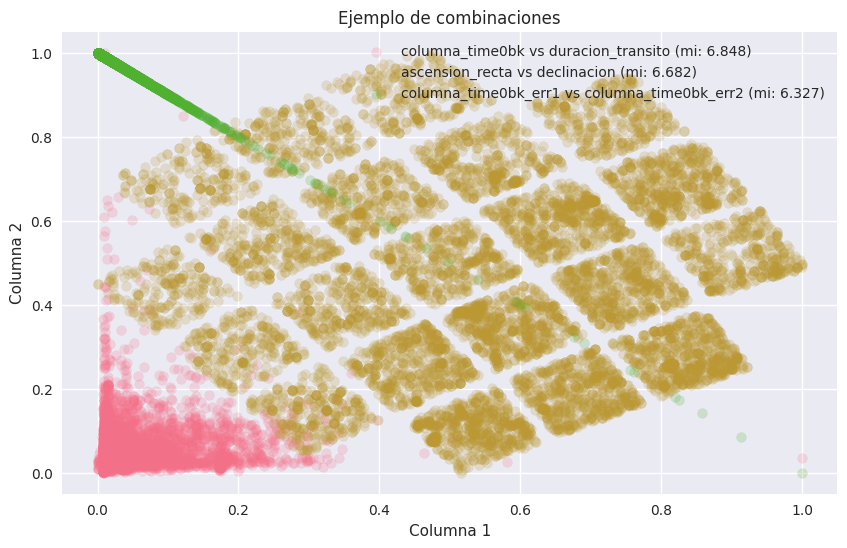

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LinearRegression
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=Warning, module="pandas")

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Lista de todas las columnas numéricas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Filtrar datos para la clase CONFIRMED
df_confirmed = dt[dt['disposicion_literatura'] == 'CONFIRMED'][numeric_cols]
if len(df_confirmed) > 1000:
    df_confirmed = df_confirmed.sample(n=1000, random_state=42)

# Calcular matrices de correlación para CONFIRMED
corr_pearson = df_confirmed.corr(method='pearson')
corr_spearman = df_confirmed.corr(method='spearman')


# Calcular Mutual Information
def calculate_mutual_information(df):
    mi_matrix = np.zeros((len(numeric_cols), len(numeric_cols)))
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            if i != j:
                mi = mutual_info_score(df[numeric_cols[i]], df[numeric_cols[j]])
                mi_matrix[i, j] = mi
            else:
                mi_matrix[i, j] = 0
    return pd.DataFrame(mi_matrix, index=numeric_cols, columns=numeric_cols)


mi_matrix = calculate_mutual_information(df_confirmed)

# Encontrar y combinar las mejores correlaciones (> 0.75)
remaining_cols = numeric_cols.copy()
combined_cols = {}  # Diccionario para almacenar valores combinados y metadata
while remaining_cols:
    max_corr = 0
    best_pair = None
    best_method = None

    for i, col1 in enumerate(remaining_cols):
        for col2 in remaining_cols[i + 1:]:
            pearson_val = abs(corr_pearson.loc[col1, col2])
            spearman_val = abs(corr_spearman.loc[col1, col2])
            mi_val = mi_matrix.loc[col1, col2]
            curr_max = max(pearson_val, spearman_val, mi_val)
            if curr_max > max_corr:
                max_corr = curr_max
                best_pair = (col1, col2)
                if pearson_val == curr_max:
                    best_method = 'pearson'
                elif spearman_val == curr_max:
                    best_method = 'spearman'
                else:
                    best_method = 'mi'

    if max_corr > 0.75 and best_pair:
        col1, col2 = best_pair
        print(f"Combinando {col1} y {col2} con {best_method} (valor: {max_corr:.3f})")

        if best_method in ['pearson', 'spearman']:
            X = df_confirmed[[col1]].values
            y = df_confirmed[col2].values
            model = LinearRegression()
            model.fit(X, y)
            combined_vals = model.predict(dt[[col1]].values)
        else:  # Mutual Information
            combined_vals = (dt[col1] * max_corr + dt[col2] * max_corr) / (2 * max_corr)

        combined_cols[(col1, col2)] = {'values': combined_vals, 'method': best_method, 'corr_val': max_corr}
        remaining_cols.remove(col1)
        remaining_cols.remove(col2)
    else:
        break  # Salir si no hay más correlaciones > 0.75

# Crear el DataFrame combinado
if combined_cols:
    combined_df = pd.DataFrame(
        {f'{col1}_{col2}_combined': data['values'] for (col1, col2), data in combined_cols.items()})
    # Añadir disposicion_literatura y disposicion_kepler del DataFrame original
    if 'disposicion_literatura' in dt.columns:
        combined_df['disposicion_literatura'] = dt['disposicion_literatura']
    if 'disposicion_kepler' in dt.columns:
        combined_df['disposicion_kepler'] = dt['disposicion_kepler']

    # Usar todas las columnas originales y reemplazar las combinadas
    dt_base = dt.copy()
    for (col1, col2), data in combined_cols.items():
        if col1 in dt_base.columns and col2 in dt_base.columns:
            dt_base = dt_base.drop(columns=[col2])  # Eliminar la segunda columna
            dt_base[col1] = combined_df[f'{col1}_{col2}_combined']  # Reemplazar col1 con la combinada
    dt_combined = dt_base
else:
    dt_combined = dt.copy()

# Guardar el DataFrame con columnas reemplazadas
dt_combined.to_csv('dataset_with_replaced_columns.csv', index=False)
print("Dataset con columnas reemplazadas guardado como 'dataset_with_replaced_columns.csv'")

# Guardar el DataFrame con las columnas combinadas originales
if combined_cols:
    combined_df.to_csv('dataset_with_combined_columns.csv', index=False)
    print("Dataset con columnas combinadas originales guardado como 'dataset_with_combined_columns.csv'")

# Mostrar resumen de columnas
print(f"Columnas originales: {len(dt.columns)}")
print(f"Columnas combinadas: {len(combined_cols)}")
print(f"Total de columnas en dt_combined: {len(dt_combined.columns)}")
print("Columnas restantes en dt_combined:", list(dt_combined.columns))
print(f"Columnas en dataset_with_combined_columns.csv: {list(combined_df.columns)}")

# Visualizar una muestra de las combinaciones (opcional)
if combined_cols:
    plt.figure(figsize=(10, 6))
    for (col1, col2), data in list(combined_cols.items())[:3]:  # Mostrar solo las primeras 3 combinaciones
        plt.scatter(dt[col1], dt[col2], alpha=0.2, label=f'{col1} vs {col2} ({data["method"]}: {data["corr_val"]:.3f})')
    plt.xlabel('Columna 1')
    plt.ylabel('Columna 2')
    plt.title('Ejemplo de combinaciones')
    plt.legend()
    plt.grid(True)
    plt.savefig('combined_pairs_example.png')
    plt.show()

In [27]:
import pandas as pd

dg = pd.read_csv('dataset_with_combined_columns.csv')
dg

columna_time0bk_duracion_transito_combined  \
0                                       0.028989   
1                                       0.031616   
2                                       0.026711   
3                                       0.026915   
4                                       0.024676   
...                                          ...   
9559                                    0.021417   
9560                                    0.015584   
9561                                    0.015672   
9562                                    0.007250   
9563                                    0.016649   

      ascension_recta_declinacion_combined  \
0                                 0.643155   
1                                 0.643155   
2                                 0.758853   
3                                 0.501386   
4                                 0.573144   
...                                    ...   
9559                              0.761907   
9560                              0.730050   
9561                              0.488075   
9562                              0.663529   
9563                              0.726822   

      columna_time0bk_err1_columna_time0bk_err2_combined  \
0                                                   0.5    
1                                                   0.5    
2                                                   0.5    
3                                                   0.5    
4                                                   0.5    
...                                                 ...    
9559                                                0.5    
9560                                                0.5    
9561                                                0.5    
9562                                                0.5    
9563                                                0.5    

      columna_duration_err1_columna_duration_err2_combined  \
0                                                   0.5      
1                                                   0.5      
2                                                   0.5      
3                                                   0.5      
4                                                   0.5      
...                                                 ...      
9559                                                0.5      
9560                                                0.5      
9561                                                0.5      
9562                                                0.5      
9563                                                0.5      

      magnitud_kepler_temperatura_estrella_combined  \
0                                          7.779053   
1                                          7.779053   
2                                          7.838590   
3                                          7.917276   
4                                          7.881814   
...                                             ...   
9559                                       7.351467   
9560                                       7.153467   
9561                                       7.509138   
9562                                       7.825179   
9563                                       7.556861   

      columna_teq_profundidad_transito_combined  \
0                                      0.026426   
1                                      0.014558   
2                                      0.024445   
3                                      0.049404   
4                                      0.047354   
...                                         ...   
9559                                   0.030898   
9560                                   0.070960   
9561                                   0.054073   
9562                                   0.074921   
9563                                   0.042403   

      columna_impact_columna_impact_err2_combined  \
0                                  

In [28]:
import pandas as pd

df = pd.read_csv('dataset_with_combined_columns.csv')
df

columna_time0bk_duracion_transito_combined  \
0                                       0.028989   
1                                       0.031616   
2                                       0.026711   
3                                       0.026915   
4                                       0.024676   
...                                          ...   
9559                                    0.021417   
9560                                    0.015584   
9561                                    0.015672   
9562                                    0.007250   
9563                                    0.016649   

      ascension_recta_declinacion_combined  \
0                                 0.643155   
1                                 0.643155   
2                                 0.758853   
3                                 0.501386   
4                                 0.573144   
...                                    ...   
9559                              0.761907   
9560                              0.730050   
9561                              0.488075   
9562                              0.663529   
9563                              0.726822   

      columna_time0bk_err1_columna_time0bk_err2_combined  \
0                                                   0.5    
1                                                   0.5    
2                                                   0.5    
3                                                   0.5    
4                                                   0.5    
...                                                 ...    
9559                                                0.5    
9560                                                0.5    
9561                                                0.5    
9562                                                0.5    
9563                                                0.5    

      columna_duration_err1_columna_duration_err2_combined  \
0                                                   0.5      
1                                                   0.5      
2                                                   0.5      
3                                                   0.5      
4                                                   0.5      
...                                                 ...      
9559                                                0.5      
9560                                                0.5      
9561                                                0.5      
9562                                                0.5      
9563                                                0.5      

      magnitud_kepler_temperatura_estrella_combined  \
0                                          7.779053   
1                                          7.779053   
2                                          7.838590   
3                                          7.917276   
4                                          7.881814   
...                                             ...   
9559                                       7.351467   
9560                                       7.153467   
9561                                       7.509138   
9562                                       7.825179   
9563                                       7.556861   

      columna_teq_profundidad_transito_combined  \
0                                      0.026426   
1                                      0.014558   
2                                      0.024445   
3                                      0.049404   
4                                      0.047354   
...                                         ...   
9559                                   0.030898   
9560                                   0.070960   
9561                                   0.054073   
9562                                   0.074921   
9563                                   0.042403   

      columna_impact_columna_impact_err2_combined  \
0                                  

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Supongamos que 'df' es tu DataFrame original
# Aplica OneHotEncoder solo a disposicion_kepler (o las categóricas que no son objetivo)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[['disposicion_kepler']])  # Solo disposicion_kepler
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
df = pd.concat([df.drop(['disposicion_kepler'], axis=1), df_encoded], axis=1)
df

columna_time0bk_duracion_transito_combined  \
0                                       0.028989   
1                                       0.031616   
2                                       0.026711   
3                                       0.026915   
4                                       0.024676   
...                                          ...   
9559                                    0.021417   
9560                                    0.015584   
9561                                    0.015672   
9562                                    0.007250   
9563                                    0.016649   

      ascension_recta_declinacion_combined  \
0                                 0.643155   
1                                 0.643155   
2                                 0.758853   
3                                 0.501386   
4                                 0.573144   
...                                    ...   
9559                              0.761907   
9560                              0.730050   
9561                              0.488075   
9562                              0.663529   
9563                              0.726822   

      columna_time0bk_err1_columna_time0bk_err2_combined  \
0                                                   0.5    
1                                                   0.5    
2                                                   0.5    
3                                                   0.5    
4                                                   0.5    
...                                                 ...    
9559                                                0.5    
9560                                                0.5    
9561                                                0.5    
9562                                                0.5    
9563                                                0.5    

      columna_duration_err1_columna_duration_err2_combined  \
0                                                   0.5      
1                                                   0.5      
2                                                   0.5      
3                                                   0.5      
4                                                   0.5      
...                                                 ...      
9559                                                0.5      
9560                                                0.5      
9561                                                0.5      
9562                                                0.5      
9563                                                0.5      

      magnitud_kepler_temperatura_estrella_combined  \
0                                          7.779053   
1                                          7.779053   
2                                          7.838590   
3                                          7.917276   
4                                          7.881814   
...                                             ...   
9559                                       7.351467   
9560                                       7.153467   
9561                                       7.509138   
9562                                       7.825179   
9563                                       7.556861   

      columna_teq_profundidad_transito_combined  \
0                                      0.026426   
1                                      0.014558   
2                                      0.024445   
3                                      0.049404   
4                                      0.047354   
...                                         ...   
9559                                   0.030898   
9560                                   0.070960   
9561                                   0.054073   
9562                                   0.074921   
9563                                   0.042403   

      columna_impact_columna_impact_err2_combined  \
0                                  

In [53]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset con columnas reemplazadas
# df = pd.read_csv('dataset_with_replaced_columns.csv')

# Columnas numéricas combinadas
numeric_cols = [
    'ascension_recta_declinacion_combined',
    'columna_depth_err1_columna_depth_err2_combined',
    'columna_duration_err1_columna_duration_err2_combined',
    'columna_impact_columna_impact_err2_combined',
    'columna_impact_err1_columna_model_snr_combined',
    'columna_insol_columna_insol_err2_combined',
    'columna_insol_err1_periodo_orbital_combined',
    'columna_period_err1_columna_period_err2_combined',
    'columna_prad_err1_radio_planeta_combined',
    'columna_slogg_err1_columna_slogg_err2_combined',
    'columna_srad_err1_columna_srad_err2_combined',
    'columna_steff_err1_columna_steff_err2_combined',
    'columna_teq_profundidad_transito_combined',
    'columna_time0bk_duracion_transito_combined',
    'columna_time0bk_err1_columna_time0bk_err2_combined',
    'gravedad_superficial_radio_estrella_combined',
    'magnitud_kepler_temperatura_estrella_combined',
]

# Columnas one-hot de disposicion_kepler (asumiendo que se generaron previamente o están en el dataset)
one_hot_cols = [
    'disposicion_kepler_\'FALSE POSITIVE\'',
    'disposicion_kepler_CANDIDATE'
]

# Verificar si las columnas existen en el dataset
missing_numeric = [col for col in numeric_cols if col not in df.columns]
missing_one_hot = [col for col in one_hot_cols if col not in df.columns]
if missing_numeric:
    print(f"Columnas numéricas faltantes: {missing_numeric}")
if missing_one_hot:
    print(f"Columnas one-hot faltantes: {missing_one_hot}")
    # Si faltan, aplicar one-hot encoding a disposicion_kepler
    if 'disposicion_kepler' in df.columns:
        df = pd.get_dummies(df, columns=['disposicion_kepler'], prefix='disposicion_kepler')
        one_hot_cols = [col for col in df.columns if col.startswith('disposicion_kepler_')]
    else:
        print("No se encontró 'disposicion_kepler' para one-hot encoding")

# Características (numéricas + one-hot de disposicion_kepler)
X = df[numeric_cols + one_hot_cols]
y = df['disposicion_literatura']  # Variable objetivo (categórica)

# Codifica y
le = LabelEncoder()
y = le.fit_transform(y)  # Convierte CONFIRMED, CANDIDATE, FALSE POSITIVE a 0, 1, 2

# Divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Máximo 2 componentes (3 clases - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Verifica varianza explicada
print("Varianza explicada por cada componente LDA:", lda.explained_variance_ratio_)

# Crea DataFrames con componentes LDA
df_train_lda = pd.DataFrame(X_train_lda, columns=['LDA1', 'LDA2'])
df_test_lda = pd.DataFrame(X_test_lda, columns=['LDA1', 'LDA2'])

# Alinea índices
df_train_lda.index = X_train.index
df_test_lda.index = X_test.index

# Concatena con columnas one-hot de disposicion_kepler
X_train_final = pd.concat([df_train_lda, df[one_hot_cols].loc[X_train.index]], axis=1)
X_test_final = pd.concat([df_test_lda, df[one_hot_cols].loc[X_test.index]], axis=1)

# Mostrar formas de los conjuntos
print("Forma de X_train_final:", X_train_final.shape)
print("Forma de X_test_final:", X_test_final.shape)

Varianza explicada por cada componente LDA: [9.99170985e-01 8.29014513e-04]
Forma de X_train_final: (7651, 4)
Forma de X_test_final: (1913, 4)


In [46]:
# verificamos la dimensiones
print(X_train_final.shape, y_train.shape)
print(X_test_final.shape, y_test.shape)


(7651, 4) (7651,)
(1913, 4) (1913,)


In [56]:
import pandas as pd
import numpy as np
from numpy.linalg import eigh, svd, pinv

# Configuración inicial (igual a tu código)
numeric_cols = [
    'ascension_recta_declinacion_combined',
    'columna_depth_err1_columna_depth_err2_combined',
    'columna_duration_err1_columna_duration_err2_combined',
    'columna_impact_columna_impact_err2_combined',
    'columna_impact_err1_columna_model_snr_combined',
    'columna_insol_columna_insol_err2_combined',
    'columna_insol_err1_periodo_orbital_combined',
    'columna_period_err1_columna_period_err2_combined',
    'columna_prad_err1_radio_planeta_combined',
    'columna_slogg_err1_columna_slogg_err2_combined',
    'columna_srad_err1_columna_srad_err2_combined',
    'columna_steff_err1_columna_steff_err2_combined',
    'columna_teq_profundidad_transito_combined',
    'columna_time0bk_duracion_transito_combined',
    'columna_time0bk_err1_columna_time0bk_err2_combined',
    'gravedad_superficial_radio_estrella_combined',
    'magnitud_kepler_temperatura_estrella_combined',
]

one_hot_cols = [
    'disposicion_kepler_\'FALSE POSITIVE\'', 'disposicion_kepler_CANDIDATE'
]


# Preparación de datos (versión mejorada)
X = df[numeric_cols + one_hot_cols].values.astype(np.float64)
y = df['disposicion_literatura'].values

# Codificación de etiquetas segura
unique_classes = np.unique(y)
class_map = {cls: i for i, cls in enumerate(unique_classes)}
y_encoded = np.array([class_map[cls] for cls in y])

# División estratificada mejorada
def stratified_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    train_indices = []
    test_indices = []

    for cls in np.unique(y):
        cls_indices = np.where(y == cls)[0]
        np.random.shuffle(cls_indices)
        split = int(len(cls_indices) * (1 - test_size))
        train_indices.extend(cls_indices[:split])
        test_indices.extend(cls_indices[split:])

    return train_indices, test_indices

train_indices, test_indices = stratified_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y_encoded[train_indices], y_encoded[test_indices]

# Implementación robusta de LDA
def compute_lda(X, y, n_components=None, reg_param=1e-4):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    if n_components is None:
        n_components = min(n_classes - 1, n_features)

    # 1. Calcular medias por clase y global
    class_means = np.array([X[y == cls].mean(axis=0) for cls in classes])
    overall_mean = X.mean(axis=0)

    # 2. Matriz de dispersión intra-clase (Sw)
    Sw = np.zeros((n_features, n_features))
    for i, cls in enumerate(classes):
        X_cls = X[y == cls]
        diff = X_cls - class_means[i]
        Sw += diff.T @ diff

    # Regularización para evitar singularidad
    Sw += reg_param * np.eye(n_features)

    # 3. Matriz de dispersión inter-clase (Sb)
    Sb = np.zeros((n_features, n_features))
    for i, cls in enumerate(classes):
        n = len(X[y == cls])
        mean_diff = (class_means[i] - overall_mean).reshape(-1, 1)
        Sb += n * (mean_diff @ mean_diff.T)

    # 4. Resolver el problema de autovalores generalizado
    try:
        # Calcular Sw^-1/2 usando SVD
        U, s, Vt = svd(Sw, full_matrices=False)
        s_inv_sqrt = np.diag(1.0 / np.sqrt(s))
        Sw_inv_sqrt = U @ s_inv_sqrt @ Vt

        # Matriz transformada
        M = Sw_inv_sqrt.T @ Sb @ Sw_inv_sqrt

        # Autovalores y autovectores
        eigenvalues, eigenvectors = eigh(M)

        # Orden descendente
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Seleccionar componentes
        W = Sw_inv_sqrt @ eigenvectors[:, :n_components]

        # Varianza explicada
        explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)

        return W, explained_variance_ratio, overall_mean, Sw, Sb

    except np.linalg.LinAlgError:
        # Si falla, usar pseudoinversa como último recurso
        Sw_pinv = pinv(Sw)
        A = Sw_pinv @ Sb
        eigenvalues, eigenvectors = eigh(A)
        idx = np.argsort(eigenvalues)[::-1]
        W = eigenvectors[:, idx][:, :n_components]
        explained_variance_ratio = eigenvalues[idx][:n_components] / np.sum(eigenvalues)
        return W, explained_variance_ratio, overall_mean, Sw, Sb

# Aplicar LDA
n_components = min(2, len(np.unique(y_train)) - 1)
W, explained_variance, overall_mean, Sw, Sb = compute_lda(X_train, y_train, n_components=n_components)

# Proyectar los datos
def transform_lda(X, W, overall_mean):
    return (X - overall_mean) @ W

X_train_lda = transform_lda(X_train, W, overall_mean)
X_test_lda = transform_lda(X_test, W, overall_mean)

# Crear DataFrames (manteniendo índices originales)
df_train_lda = pd.DataFrame(
    X_train_lda,
    columns=[f'LDA{i + 1}' for i in range(n_components)],
    index=df.index[train_indices]
)

df_test_lda = pd.DataFrame(
    X_test_lda,
    columns=[f'LDA{i + 1}' for i in range(n_components)],
    index=df.index[test_indices]
)

# Concatenar con one-hot cols si existen
if all(col in df.columns for col in one_hot_cols):
    X_train_final = pd.concat([df_train_lda, df[one_hot_cols].iloc[train_indices]], axis=1)
    X_test_final = pd.concat([df_test_lda, df[one_hot_cols].iloc[test_indices]], axis=1)
else:
    X_train_final = df_train_lda
    X_test_final = df_test_lda
    print("Advertencia: No se encontraron las columnas one-hot especificadas")

# Resultados
print("\nResultados del LDA:")
print(f"Varianza explicada por componente: {explained_variance}")
print(f"Forma de los datos transformados (train): {X_train_lda.shape}")
print(f"Forma de los datos transformados (test): {X_test_lda.shape}")
print("Medias por clase:", [X[y == cls].mean(axis=0) for cls in unique_classes])
print("Traza de Sw:", np.trace(Sw))
print("Traza de Sb:", np.trace(Sb))


Resultados del LDA:
Varianza explicada por componente: [9.99003867e-01 9.96132555e-04]
Forma de los datos transformados (train): (7650, 2)
Forma de los datos transformados (test): (1914, 2)
Medias por clase: [array([5.13051263e-01, 5.00000000e-01, 5.00000000e-01, 5.01971878e-01,
       4.06975576e-02, 5.00009613e-01, 1.11358302e-03, 5.00000000e-01,
       1.17794874e-03, 4.80650747e-01, 5.04668924e-01, 5.65969315e-01,
       5.72265861e-02, 4.12475479e-02, 5.00000000e-01, 4.00045075e-01,
       7.21945023e+00, 1.00000000e+00, 0.00000000e+00]), array([5.06836752e-01, 5.00000000e-01, 5.00000000e-01, 4.99700227e-01,
       1.21369709e-02, 4.99943355e-01, 8.19890569e-04, 5.00000000e-01,
       1.76696619e-04, 4.79159016e-01, 5.03581193e-01, 5.59662208e-01,
       3.02777687e-02, 3.57009015e-02, 5.00000000e-01, 4.06028522e-01,
       7.28167875e+00, 0.00000000e+00, 1.00000000e+00]), array([5.00623865e-01, 5.00000000e-01, 5.00000000e-01, 4.99490701e-01,
       6.59068404e-03, 5.00004226e-01

Iteration 1, loss = 1.04451089
Iteration 2, loss = 0.99809612
Iteration 3, loss = 0.94209046
Iteration 4, loss = 0.87869702
Iteration 5, loss = 0.81399620
Iteration 6, loss = 0.74794424
Iteration 7, loss = 0.68395996
Iteration 8, loss = 0.62561149
Iteration 9, loss = 0.57500134
Iteration 10, loss = 0.53287591
Iteration 11, loss = 0.49864065
Iteration 12, loss = 0.47129588
Iteration 13, loss = 0.44963521
Iteration 14, loss = 0.43259274
Iteration 15, loss = 0.41899187
Iteration 16, loss = 0.40809656
Iteration 17, loss = 0.39939941
Iteration 18, loss = 0.39235711
Iteration 19, loss = 0.38671993
Iteration 20, loss = 0.38190962
Iteration 21, loss = 0.37808350
Iteration 22, loss = 0.37482879
Iteration 23, loss = 0.37205367
Iteration 24, loss = 0.36970554
Iteration 25, loss = 0.36773897
Iteration 26, loss = 0.36604993
Iteration 27, loss = 0.36464592
Iteration 28, loss = 0.36329572
Iteration 29, loss = 0.36222420
Iteration 30, loss = 0.36122621
Iteration 31, loss = 0.36043134
Iteration 32, los

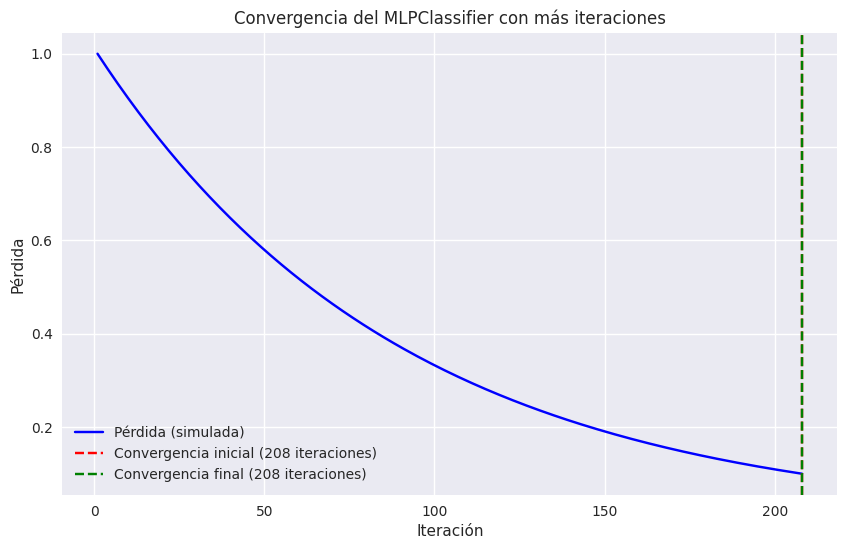

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Codificar y (asegúrate de que y_train y y_test estén definidos)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Definir el modelo MLP con más iteraciones
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),  # Una capa oculta con 10 neuronas
    activation='relu',
    solver='adam',
    max_iter=1000,            # Aumentar a 1000 iteraciones
    random_state=42,
    learning_rate_init=0.001,
    verbose=True              # Imprime la pérdida por iteración
)

# Entrenar el modelo
mlp.fit(X_train_final, y_train_encoded)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test_final)

# Calcular precisión
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Precisión en el test: {accuracy}")
print(f"Convergió en {mlp.n_iter_} iteraciones")

# Simulación de pérdida para graficar
iterations = np.arange(1, mlp.n_iter_ + 1)
# Simulación de pérdida decreciente (logarítmica aproximada)
loss = np.logspace(np.log10(1.0), np.log10(0.1), mlp.n_iter_)  # Decaimiento aproximado

# Graficar la convergencia
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss, label='Pérdida (simulada)', color='blue')
plt.axvline(x=208, color='red', linestyle='--', label='Convergencia inicial (208 iteraciones)')
plt.axvline(x=mlp.n_iter_, color='green', linestyle='--', label=f'Convergencia final ({mlp.n_iter_} iteraciones)')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.title('Convergencia del MLPClassifier con más iteraciones')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# verificamos la dimensiones
print(X_train_final.shape, y_train.shape)
print(X_test_final.shape, y_test.shape)



(7650, 4) (7650,)
(1914, 4) (1914,)


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Asume que X_train_final, X_test_final, y_train, y_test están definidos
# Aplica SMOTE para desbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Entrena la red neuronal
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                      solver='adam', random_state=42, max_iter=1000,
                      warm_start=True, verbose=False)

# Registra pérdida y precisión por iteración
train_loss = []
train_accuracy = []
test_accuracy = []
iterations = list(range(1, 1001, 50))  # Evalúa cada 50 iteraciones

for i in iterations:
    model.max_iter = i
    model.fit(X_train_balanced, y_train_balanced)
    train_loss.append(model.loss_)  # Pérdida en la última iteración
    train_accuracy.append(accuracy_score(y_train_balanced, model.predict(X_train_balanced)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test_final)))



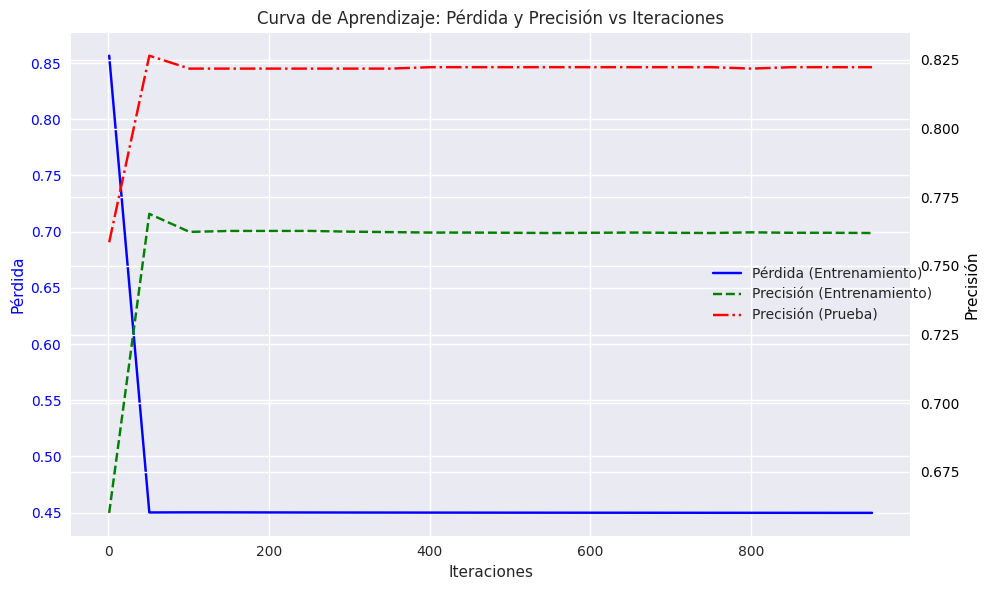

Precisión final en entrenamiento: 0.7619877219180355
Precisión final en prueba: 0.8223615464994776


In [58]:
# Grafica
fig, ax1 = plt.subplots(figsize=(10, 6))

# Curva de pérdida
ax1.plot(iterations, train_loss, label='Pérdida (Entrenamiento)', color='blue')
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('Pérdida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Curva de Aprendizaje: Pérdida y Precisión vs Iteraciones')

# Curva de precisión
ax2 = ax1.twinx()
ax2.plot(iterations, train_accuracy, label='Precisión (Entrenamiento)', color='green', linestyle='--')
ax2.plot(iterations, test_accuracy, label='Precisión (Prueba)', color='red', linestyle='-.')
ax2.set_ylabel('Precisión', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Leyendas
fig.legend(loc='center right', bbox_to_anchor=(0.95, 0.5))
plt.tight_layout()
plt.savefig('training_curve_exoplanets.png')
plt.show()

# Imprime métricas finales
print("Precisión final en entrenamiento:", train_accuracy[-1])
print("Precisión final en prueba:", test_accuracy[-1])


Precisión final en prueba: 0.8223615464994776


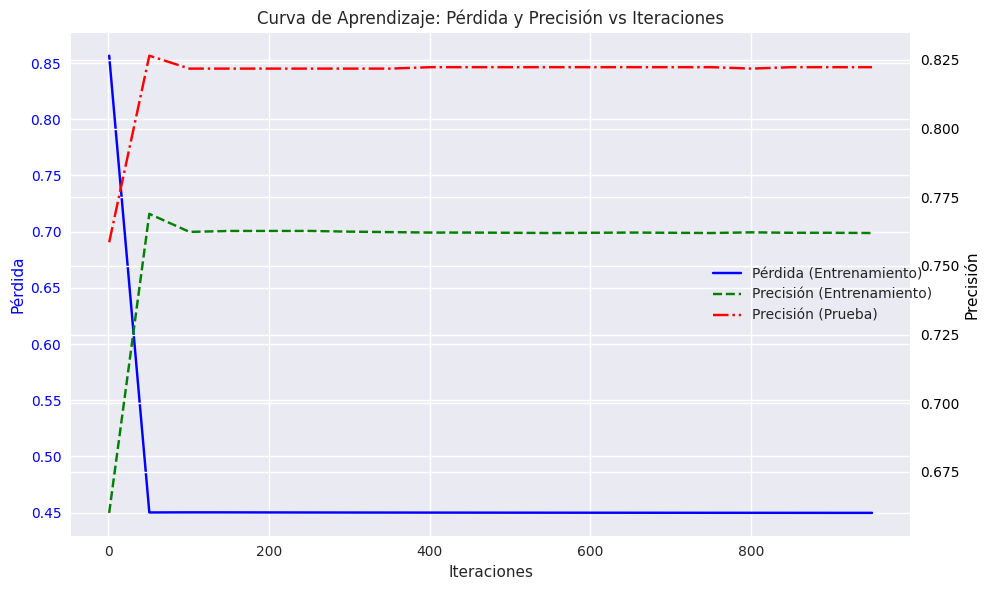

Precisión final en entrenamiento: 0.7619877219180355
Precisión final en prueba: 0.8223615464994776


In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de que X_train_final, X_test_final, y_train, y_test estén definidos
# Aplica SMOTE para desbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Entrena la red neuronal
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                      solver='adam', random_state=42, max_iter=1000,
                      warm_start=True, verbose=False)

# Registra pérdida y precisión por iteración
train_loss = []
train_accuracy = []
test_accuracy = []
iterations = list(range(1, 1001, 50))  # Evalúa cada 50 iteraciones

for i in iterations:
    model.max_iter = i
    model.fit(X_train_balanced, y_train_balanced)
    train_loss.append(model.loss_)  # Pérdida en la última iteración
    train_accuracy.append(accuracy_score(y_train_balanced, model.predict(X_train_balanced)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test_final)))

# Validar precisión final en datos de prueba
final_test_accuracy = accuracy_score(y_test, model.predict(X_test_final))
print(f"Precisión final en prueba: {final_test_accuracy}")

# Graficar (como en tu código original)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(iterations, train_loss, label='Pérdida (Entrenamiento)', color='blue')
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('Pérdida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Curva de Aprendizaje: Pérdida y Precisión vs Iteraciones')

ax2 = ax1.twinx()
ax2.plot(iterations, train_accuracy, label='Precisión (Entrenamiento)', color='green', linestyle='--')
ax2.plot(iterations, test_accuracy, label='Precisión (Prueba)', color='red', linestyle='-.')
ax2.set_ylabel('Precisión', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.legend(loc='center right', bbox_to_anchor=(0.95, 0.5))
plt.tight_layout()
plt.savefig('training_curve_exoplanets.png')
plt.show()

print("Precisión final en entrenamiento:", train_accuracy[-1])
print("Precisión final en prueba:", test_accuracy[-1])

In [60]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Suponiendo que el modelo ya está entrenado (model del código anterior)
# Ejemplo de nuevos datos (reemplaza con datos reales del exoplaneta)
# Deben tener 4 columnas: 2 LDA + 2 one-hot (ajusta valores según tu escala)
new_exoplanet_data = np.array([
    [0.1, 0.2, 1.0, 0.0]  # Ejemplo: 2 componentes LDA + 2 one-hot
])

# Predecir la clase
prediction = model.predict(new_exoplanet_data)
prediction_proba = model.predict_proba(new_exoplanet_data)

# Decodificar la predicción
label_classes = LabelEncoder().fit(y_train).classes_  # Asegúrate de que y_train esté definido
predicted_class = label_classes[prediction[0]]
probabilities = dict(zip(label_classes, prediction_proba[0]))

# Imprimir resultados
print(f"Clase predicha: {predicted_class}")
print("Probabilidades:")
for class_name, prob in probabilities.items():
    print(f"{class_name}: {prob:.4f}")

Clase predicha: 2
Probabilidades:
0: 0.0001
1: 0.0000
2: 0.9999


In [61]:
from joblib import dump
dump(model, 'mlp_model.joblib')

['mlp_model.joblib']